## Project Stage - III (Basic Machine Learning)

## Goals

The goal of Stage II is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.

### Tasks:

#### Task 1: (70 pts)
- Team: (30)
    - Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US. 
        - Aim to predict 1 week in advance. Use older data to validate your models. 
        - Describe the trends as compared to other countries. 
- Member: (40 pts)
    - Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties. 
    - Identify which counties are most at risk.
    - Utilize the hospital data to calculate the point of no return for a state. 
    - Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each. 
    - Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county.
        - For example, percentage of population in certain age-group, socio-economic status, public transportation, work from home, etc.
        - Show the relative importance of variables and explain why. 
    
#### Task 2: (30 pts)
- Member:
    - For each of the aforemention analysis plot graphs,
        - trend line
        - confidence intervals
        - prediction path

**Deliverable**
- Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

## Deadline: 11/15/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
case_raw=pd.read_csv('../Data/Input/covid_confirmed_usafacts.csv', na_values=['X'])
death_raw=pd.read_csv('../Data/Input/covid_deaths_usafacts.csv', na_values=['X'])
popu_raw=pd.read_csv('../Data/Input/covid_county_population_usafacts.csv', na_values=['X'])
TX_case_raw=case_raw[(case_raw.State=='TX')&(case_raw.countyFIPS>0)]
TX_death_raw=death_raw[(death_raw.State=='TX')&(death_raw.countyFIPS>0)]
popu_raw=popu_raw[(popu_raw.State=='TX')&(popu_raw.countyFIPS>0)]

In [3]:
TX_case_raw.head()

countyFIPS      County Name State  stateFIPS  1/22/20  1/23/20  1/24/20  \
2569       48001  Anderson County    TX         48        0        0        0   
2570       48003   Andrews County    TX         48        0        0        0   
2571       48005  Angelina County    TX         48        0        0        0   
2572       48007   Aransas County    TX         48        0        0        0   
2573       48009    Archer County    TX         48        0        0        0   

      1/25/20  1/26/20  1/27/20  ...  10/13/20  10/14/20  10/15/20  10/16/20  \
2569        0        0        0  ...      2885      2885      2903      2906   
2570        0        0        0  ...       518       518       518       547   
2571        0        0        0  ...      2221      2221      2221      2251   
2572        0        0        0  ...       340       340       340       340   
2573        0        0        0  ...       101       103       105       106   

      10/17/20  10/18/20  10/19/20  10/20/20  10/21/20  10/22/20  
2569      2909      2909      2909      2920      2922      2934  
2570       547       547       547       549       567       567  
2571      2251      2251      2251      2251      2277      2277  
2572       340       340       340       340       340       340  
2573       114       114       114       114       133       133  

[5 rows x 279 columns]

In [4]:
TX_death_raw.head()

countyFIPS      County Name State  stateFIPS  1/22/20  1/23/20  1/24/20  \
2569       48001  Anderson County    TX         48        0        0        0   
2570       48003   Andrews County    TX         48        0        0        0   
2571       48005  Angelina County    TX         48        0        0        0   
2572       48007   Aransas County    TX         48        0        0        0   
2573       48009    Archer County    TX         48        0        0        0   

      1/25/20  1/26/20  1/27/20  ...  10/13/20  10/14/20  10/15/20  10/16/20  \
2569        0        0        0  ...        37        38        38        38   
2570        0        0        0  ...        10        10        10        10   
2571        0        0        0  ...        86        86        86        87   
2572        0        0        0  ...        18        18        18        18   
2573        0        0        0  ...         1         1         1         1   

      10/17/20  10/18/20  10/19/20  10/20/20  10/21/20  10/22/20  
2569        38        38        38        38        39        39  
2570        10        10        10        10        10        10  
2571        87        88        88        88        90        90  
2572        18        18        18        18        18        18  
2573         1         1         1         1         1         1  

[5 rows x 279 columns]

In [5]:
TX_case_popu=popu_raw.merge(TX_case_raw,left_index=True,right_index=True)
TX_case_popu.head()

countyFIPS_x    County Name_x State_x  population  countyFIPS_y  \
2569         48001  Anderson County      TX       57735         48001   
2570         48003   Andrews County      TX       18705         48003   
2571         48005  Angelina County      TX       86715         48005   
2572         48007   Aransas County      TX       23510         48007   
2573         48009    Archer County      TX        8553         48009   

        County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...  10/13/20  \
2569  Anderson County      TX         48        0        0  ...      2885   
2570   Andrews County      TX         48        0        0  ...       518   
2571  Angelina County      TX         48        0        0  ...      2221   
2572   Aransas County      TX         48        0        0  ...       340   
2573    Archer County      TX         48        0        0  ...       101   

      10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
2569      2885      2903      2906      2909      2909      2909      2920   
2570       518       518       547       547       547       547       549   
2571      2221      2221      2251      2251      2251      2251      2251   
2572       340       340       340       340       340       340       340   
2573       103       105       106       114       114       114       114   

      10/21/20  10/22/20  
2569      2922      2934  
2570       567       567  
2571      2277      2277  
2572       340       340  
2573       133       133  

[5 rows x 283 columns]

In [6]:
TX_death_popu=popu_raw.merge(TX_death_raw,left_index=True,right_index=True)
TX_death_popu.head()

countyFIPS_x    County Name_x State_x  population  countyFIPS_y  \
2569         48001  Anderson County      TX       57735         48001   
2570         48003   Andrews County      TX       18705         48003   
2571         48005  Angelina County      TX       86715         48005   
2572         48007   Aransas County      TX       23510         48007   
2573         48009    Archer County      TX        8553         48009   

        County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...  10/13/20  \
2569  Anderson County      TX         48        0        0  ...        37   
2570   Andrews County      TX         48        0        0  ...        10   
2571  Angelina County      TX         48        0        0  ...        86   
2572   Aransas County      TX         48        0        0  ...        18   
2573    Archer County      TX         48        0        0  ...         1   

      10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
2569        38        38        38        38        38        38        38   
2570        10        10        10        10        10        10        10   
2571        86        86        87        87        88        88        88   
2572        18        18        18        18        18        18        18   
2573         1         1         1         1         1         1         1   

      10/21/20  10/22/20  
2569        39        39  
2570        10        10  
2571        90        90  
2572        18        18  
2573         1         1  

[5 rows x 283 columns]

In [7]:
TX_death_=TX_death_popu.sum()
TX_death_

countyFIPS_x                                              12256516
County Name_x    Anderson CountyAndrews CountyAngelina CountyAr...
State_x          TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...
population                                                28995881
countyFIPS_y                                              12256516
                                       ...                        
10/18/20                                                     17005
10/19/20                                                     17013
10/20/20                                                     17078
10/21/20                                                     17192
10/22/20                                                     17277
Length: 283, dtype: object

In [8]:
TX_death_=TX_death_[8:]
TX_death_

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
10/18/20    17005
10/19/20    17013
10/20/20    17078
10/21/20    17192
10/22/20    17277
Length: 275, dtype: object

In [9]:
TX_case_=TX_case_popu.sum()
TX_case_


countyFIPS_x                                              12256516
County Name_x    Anderson CountyAndrews CountyAngelina CountyAr...
State_x          TXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTXTX...
population                                                28995881
countyFIPS_y                                              12256516
                                       ...                        
10/18/20                                                    837659
10/19/20                                                    840215
10/20/20                                                    845279
10/21/20                                                    850729
10/22/20                                                    857095
Length: 283, dtype: object

In [10]:
popu_state=TX_case_['population']
print(str(popu_state))
TX_case_=TX_case_[8:]
TX_case_

28995881


1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
             ...  
10/18/20    837659
10/19/20    840215
10/20/20    845279
10/21/20    850729
10/22/20    857095
Length: 275, dtype: object

In [11]:
TX_case=pd.DataFrame({'case':TX_case_,'death':TX_death_})
TX_case

case  death
1/22/20        0      0
1/23/20        0      0
1/24/20        0      0
1/25/20        0      0
1/26/20        0      0
...          ...    ...
10/18/20  837659  17005
10/19/20  840215  17013
10/20/20  845279  17078
10/21/20  850729  17192
10/22/20  857095  17277

[275 rows x 2 columns]

In [12]:
#To compare the data in different counties, we normalize the case number by population
#To record the first case, we count the case number every 30000000 population here
TX_case=round(TX_case/popu_state*30000000)
TX_case=TX_case.astype('int')
TX_case

case  death
1/22/20        0      0
1/23/20        0      0
1/24/20        0      0
1/25/20        0      0
1/26/20        0      0
...          ...    ...
10/18/20  866666  17593
10/19/20  869311  17602
10/20/20  874550  17669
10/21/20  880189  17787
10/22/20  886775  17875

[275 rows x 2 columns]

- we drop the row which case number is zero. 

In [13]:
TX_case=TX_case[TX_case.case>0]
TX_case

case  death
3/5/20         3      0
3/6/20         4      0
3/7/20         8      0
3/8/20        11      0
3/9/20        16      0
...          ...    ...
10/18/20  866666  17593
10/19/20  869311  17602
10/20/20  874550  17669
10/21/20  880189  17787
10/22/20  886775  17875

[232 rows x 2 columns]

- Next we compute the new case for each day. And add a new column DAFC which stands for Day after First Observed Case .


In [14]:
TX_case.case=TX_case.case.diff()
TX_case

/home/peter/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


case  death
3/5/20       NaN      0
3/6/20       1.0      0
3/7/20       4.0      0
3/8/20       3.0      0
3/9/20       5.0      0
...          ...    ...
10/18/20  5990.0  17593
10/19/20  2645.0  17602
10/20/20  5239.0  17669
10/21/20  5639.0  17787
10/22/20  6586.0  17875

[232 rows x 2 columns]

In [15]:
TX_case=TX_case.fillna(3)  #because we can see the case number for 3/5 is 3
TX_case.head()

case  death
3/5/20   3.0      0
3/6/20   1.0      0
3/7/20   4.0      0
3/8/20   3.0      0
3/9/20   5.0      0

In [16]:
TX_case.death=TX_case.death.diff()
TX_case=TX_case.fillna(0) 
TX_case['DAFC']=range(len(TX_case))
TX_case.head()

case  death  DAFC
3/5/20   3.0    0.0     0
3/6/20   1.0    0.0     1
3/7/20   4.0    0.0     2
3/8/20   3.0    0.0     3
3/9/20   5.0    0.0     4

- I choose the top 5 highest case counties. And compare their new case trend with the state's trend.

In [17]:
TX_case_top5=TX_case_popu.sort_values(by=TX_case_raw.columns[-1],ascending=False)
TX_case_top5

countyFIPS_x   County Name_x State_x  population  countyFIPS_y  \
2669         48201   Harris County      TX     4713325         48201   
2625         48113   Dallas County      TX     2635516         48113   
2583         48029    Bexar County      TX     2003554         48029   
2788         48439  Tarrant County      TX     2102515         48439   
2639         48141  El Paso County      TX      839238         48141   
...            ...             ...     ...         ...           ...   
2699         48261   Kenedy County      TX         404         48261   
2790         48443  Terrell County      TX         776         48443   
2585         48033   Borden County      TX         654         48033   
2703         48269     King County      TX         272         48269   
2719         48301   Loving County      TX         169         48301   

       County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...  10/13/20  \
2669   Harris County      TX         48        0        0  ...    151463   
2625   Dallas County      TX         48        0        0  ...     86775   
2583    Bexar County      TX         48        0        0  ...     59902   
2788  Tarrant County      TX         48        0        0  ...     51222   
2639  El Paso County      TX         48        0        0  ...     29384   
...              ...     ...        ...      ...      ...  ...       ...   
2699   Kenedy County      TX         48        0        0  ...         7   
2790  Terrell County      TX         48        0        0  ...         3   
2585   Borden County      TX         48        0        0  ...         1   
2703     King County      TX         48        0        0  ...         1   
2719   Loving County      TX         48        0        0  ...         0   

      10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
2669    151880    152623    152977    153571    153955    154367    154765   
2625     87381     87835     88372     88834     89433     89987     90318   
2583     60034     60258     60442     60629     63328     63426     63594   
2788     51676     52112     52634     53128     53629     54025     54332   
2639     29887     29887     31478     32060     32758     33326     34035   
...        ...       ...       ...       ...       ...       ...       ...   
2699         7         7         7         7         7         7         7   
2790         3         3         4         4         4         4         4   
2585         1         1         1         1         2         2         2   
2703         1         1         1         1         1         1         1   
2719         0         0         0         0         0         0         0   

      10/21/20  10/22/20  
2669    155192    156035  
2625     90790     91313  
2583     63807     64014  
2788     54727     55240  
2639     34760     36025  
...        ...       ...  
2699         7         7  
2790         4         4  
2585         2         2  
2703         1         1  
2719         0         0  

[254 rows x 283 columns]

In [18]:
TX_case_top5=TX_case_top5[:][:5]
TX_case_top5

countyFIPS_x   County Name_x State_x  population  countyFIPS_y  \
2669         48201   Harris County      TX     4713325         48201   
2625         48113   Dallas County      TX     2635516         48113   
2583         48029    Bexar County      TX     2003554         48029   
2788         48439  Tarrant County      TX     2102515         48439   
2639         48141  El Paso County      TX      839238         48141   

       County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...  10/13/20  \
2669   Harris County      TX         48        0        0  ...    151463   
2625   Dallas County      TX         48        0        0  ...     86775   
2583    Bexar County      TX         48        0        0  ...     59902   
2788  Tarrant County      TX         48        0        0  ...     51222   
2639  El Paso County      TX         48        0        0  ...     29384   

      10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
2669    151880    152623    152977    153571    153955    154367    154765   
2625     87381     87835     88372     88834     89433     89987     90318   
2583     60034     60258     60442     60629     63328     63426     63594   
2788     51676     52112     52634     53128     53629     54025     54332   
2639     29887     29887     31478     32060     32758     33326     34035   

      10/21/20  10/22/20  
2669    155192    156035  
2625     90790     91313  
2583     63807     64014  
2788     54727     55240  
2639     34760     36025  

[5 rows x 283 columns]

- Normalization, same as what we did for state

In [19]:
for column in TX_case_top5.columns[8:]:
    TX_case_top5[column]=round(TX_case_top5[column]/TX_case_top5['population']*30000000)
TX_case_top5

countyFIPS_x   County Name_x State_x  population  countyFIPS_y  \
2669         48201   Harris County      TX     4713325         48201   
2625         48113   Dallas County      TX     2635516         48113   
2583         48029    Bexar County      TX     2003554         48029   
2788         48439  Tarrant County      TX     2102515         48439   
2639         48141  El Paso County      TX      839238         48141   

       County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...   10/13/20  \
2669   Harris County      TX         48      0.0      0.0  ...   964052.0   
2625   Dallas County      TX         48      0.0      0.0  ...   987757.0   
2583    Bexar County      TX         48      0.0      0.0  ...   896936.0   
2788  Tarrant County      TX         48      0.0      0.0  ...   730868.0   
2639  El Paso County      TX         48      0.0      0.0  ...  1050381.0   

       10/14/20   10/15/20   10/16/20   10/17/20   10/18/20   10/19/20  \
2669   966706.0   971435.0   973688.0   977469.0   979913.0   982536.0   
2625   994655.0   999823.0  1005936.0  1011195.0  1018013.0  1024319.0   
2583   898913.0   902267.0   905022.0   907822.0   948235.0   949702.0   
2788   737346.0   743567.0   751015.0   758064.0   765212.0   770863.0   
2639  1068362.0  1068362.0  1125235.0  1146040.0  1170991.0  1191295.0   

       10/20/20   10/21/20   10/22/20  
2669   985069.0   987787.0   993152.0  
2625  1028087.0  1033460.0  1039413.0  
2583   952218.0   955407.0   958507.0  
2788   775243.0   780879.0   788199.0  
2639  1216639.0  1242556.0  1287775.0  

[5 rows x 283 columns]

In [20]:
TX_case_top5=TX_case_top5.set_index(['County Name_x'])
TX_case_top5

countyFIPS_x State_x  population  countyFIPS_y  \
County Name_x                                                    
Harris County          48201      TX     4713325         48201   
Dallas County          48113      TX     2635516         48113   
Bexar County           48029      TX     2003554         48029   
Tarrant County         48439      TX     2102515         48439   
El Paso County         48141      TX      839238         48141   

                 County Name_y State_y  stateFIPS  1/22/20  1/23/20  1/24/20  \
County Name_x                                                                  
Harris County    Harris County      TX         48      0.0      0.0      0.0   
Dallas County    Dallas County      TX         48      0.0      0.0      0.0   
Bexar County      Bexar County      TX         48      0.0      0.0      0.0   
Tarrant County  Tarrant County      TX         48      0.0      0.0      0.0   
El Paso County  El Paso County      TX         48      0.0      0.0      0.0   

                ...   10/13/20   10/14/20   10/15/20   10/16/20   10/17/20  \
County Name_x   ...                                                          
Harris County   ...   964052.0   966706.0   971435.0   973688.0   977469.0   
Dallas County   ...   987757.0   994655.0   999823.0  1005936.0  1011195.0   
Bexar County    ...   896936.0   898913.0   902267.0   905022.0   907822.0   
Tarrant County  ...   730868.0   737346.0   743567.0   751015.0   758064.0   
El Paso County  ...  1050381.0  1068362.0  1068362.0  1125235.0  1146040.0   

                 10/18/20   10/19/20   10/20/20   10/21/20   10/22/20  
County Name_x                                                          
Harris County    979913.0   982536.0   985069.0   987787.0   993152.0  
Dallas County   1018013.0  1024319.0  1028087.0  1033460.0  1039413.0  
Bexar County     948235.0   949702.0   952218.0   955407.0   958507.0  
Tarrant County   765212.0   770863.0   775243.0   780879.0   788199.0  
El Paso County  1170991.0  1191295.0  1216639.0  1242556.0  1287775.0  

[5 rows x 282 columns]

In [21]:
TX_case_top5

countyFIPS_x State_x  population  countyFIPS_y  \
County Name_x                                                    
Harris County          48201      TX     4713325         48201   
Dallas County          48113      TX     2635516         48113   
Bexar County           48029      TX     2003554         48029   
Tarrant County         48439      TX     2102515         48439   
El Paso County         48141      TX      839238         48141   

                 County Name_y State_y  stateFIPS  1/22/20  1/23/20  1/24/20  \
County Name_x                                                                  
Harris County    Harris County      TX         48      0.0      0.0      0.0   
Dallas County    Dallas County      TX         48      0.0      0.0      0.0   
Bexar County      Bexar County      TX         48      0.0      0.0      0.0   
Tarrant County  Tarrant County      TX         48      0.0      0.0      0.0   
El Paso County  El Paso County      TX         48      0.0      0.0      0.0   

                ...   10/13/20   10/14/20   10/15/20   10/16/20   10/17/20  \
County Name_x   ...                                                          
Harris County   ...   964052.0   966706.0   971435.0   973688.0   977469.0   
Dallas County   ...   987757.0   994655.0   999823.0  1005936.0  1011195.0   
Bexar County    ...   896936.0   898913.0   902267.0   905022.0   907822.0   
Tarrant County  ...   730868.0   737346.0   743567.0   751015.0   758064.0   
El Paso County  ...  1050381.0  1068362.0  1068362.0  1125235.0  1146040.0   

                 10/18/20   10/19/20   10/20/20   10/21/20   10/22/20  
County Name_x                                                          
Harris County    979913.0   982536.0   985069.0   987787.0   993152.0  
Dallas County   1018013.0  1024319.0  1028087.0  1033460.0  1039413.0  
Bexar County     948235.0   949702.0   952218.0   955407.0   958507.0  
Tarrant County   765212.0   770863.0   775243.0   780879.0   788199.0  
El Paso County  1170991.0  1191295.0  1216639.0  1242556.0  1287775.0  

[5 rows x 282 columns]

In [22]:
TX_case_top5=TX_case_top5[TX_case_top5.columns[7:]]
TX_case_top5=TX_case_top5.T
TX_case_top5.head(10)

County Name_x  Harris County  Dallas County  Bexar County  Tarrant County  \
1/22/20                  0.0            0.0           0.0             0.0   
1/23/20                  0.0            0.0           0.0             0.0   
1/24/20                  0.0            0.0           0.0             0.0   
1/25/20                  0.0            0.0           0.0             0.0   
1/26/20                  0.0            0.0           0.0             0.0   
1/27/20                  0.0            0.0           0.0             0.0   
1/28/20                  0.0            0.0           0.0             0.0   
1/29/20                  0.0            0.0           0.0             0.0   
1/30/20                  0.0            0.0           0.0             0.0   
1/31/20                  0.0            0.0           0.0             0.0   

County Name_x  El Paso County  
1/22/20                   0.0  
1/23/20                   0.0  
1/24/20                   0.0  
1/25/20                   0.0  
1/26/20                   0.0  
1/27/20                   0.0  
1/28/20                   0.0  
1/29/20                   0.0  
1/30/20                   0.0  
1/31/20                   0.0

- Next, we find the death date for thoes five counties

In [23]:
TX_death_top5=TX_death_popu.set_index(['County Name_x'])

In [24]:
for column in TX_death_top5.columns[7:]:
    TX_death_top5[column]=round(TX_death_top5[column]/TX_death_top5['population']*30000000)
TX_death_top5

countyFIPS_x State_x  population  countyFIPS_y  \
County Name_x                                                     
Anderson County         48001      TX       57735         48001   
Andrews County          48003      TX       18705         48003   
Angelina County         48005      TX       86715         48005   
Aransas County          48007      TX       23510         48007   
Archer County           48009      TX        8553         48009   
...                       ...     ...         ...           ...   
Wood County             48499      TX       45539         48499   
Yoakum County           48501      TX        8713         48501   
Young County            48503      TX       18010         48503   
Zapata County           48505      TX       14179         48505   
Zavala County           48507      TX       11840         48507   

                   County Name_y State_y  stateFIPS  1/22/20  1/23/20  \
County Name_x                                                           
Anderson County  Anderson County      TX         48      0.0      0.0   
Andrews County    Andrews County      TX         48      0.0      0.0   
Angelina County  Angelina County      TX         48      0.0      0.0   
Aransas County    Aransas County      TX         48      0.0      0.0   
Archer County      Archer County      TX         48      0.0      0.0   
...                          ...     ...        ...      ...      ...   
Wood County          Wood County      TX         48      0.0      0.0   
Yoakum County      Yoakum County      TX         48      0.0      0.0   
Young County        Young County      TX         48      0.0      0.0   
Zapata County      Zapata County      TX         48      0.0      0.0   
Zavala County      Zavala County      TX         48      0.0      0.0   

                 1/24/20  ...  10/13/20  10/14/20  10/15/20  10/16/20  \
County Name_x             ...                                           
Anderson County      0.0  ...   19226.0   19745.0   19745.0   19745.0   
Andrews County       0.0  ...   16038.0   16038.0   16038.0   16038.0   
Angelina County      0.0  ...   29753.0   29753.0   29753.0   30099.0   
Aransas County       0.0  ...   22969.0   22969.0   22969.0   22969.0   
Archer County        0.0  ...    3508.0    3508.0    3508.0    3508.0   
...                  ...  ...       ...       ...       ...       ...   
Wood County          0.0  ...   20422.0   21081.0   21081.0   21740.0   
Yoakum County        0.0  ...   17216.0   17216.0   17216.0   17216.0   
Young County         0.0  ...    9994.0    9994.0    9994.0    9994.0   
Zapata County        0.0  ...   12695.0   12695.0   12695.0   12695.0   
Zavala County        0.0  ...   43074.0   43074.0   43074.0   45608.0   

                 10/17/20  10/18/20  10/19/20  10/20/20  10/21/20  10/22/20  
County Name_x                                                                
Anderson County   19745.0   19745.0   19745.0   19745.0   20265.0   20265.0  
Andrews County    16038.0   16038.0   16038.0   16038.0   16038.0   16038.0  
Angelina County   30099.0   30445.0   30445.0   30445.0   31136.0   31136.0  
Aransas County    22969.0   22969.0   22969.0   22969.0   22969.0   22969.0  
Archer County      3508.0    3508.0    3508.0    3508.0    3508.0    3508.0  
...                   ...       ...       ...       ...       ...       ...  
Wood County       22398.0   22398.0   22398.0   23057.0   23057.0   23716.0  
Yoakum County     17216.0   17216.0   17216.0   17216.0   17216.0   17216.0  
Young County       9994.0    9994.0    9994.0    9994.0    9994.0    9994.0  
Zapata County     12695.0   12695.0   12695.0   12695.0   16926.0   19042.0  
Zavala County     45608.0   45608.0   45608.0   45608.0   45608.0   45608.0  

[254 rows x 282 columns]

In [25]:
TX_death_top5=TX_death_top5[TX_death_top5.columns[7:]]
TX_death_top5

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
County Name_x                                                           
Anderson County      0.0      0.0      0.0      0.0      0.0      0.0   
Andrews County       0.0      0.0      0.0      0.0      0.0      0.0   
Angelina County      0.0      0.0      0.0      0.0      0.0      0.0   
Aransas County       0.0      0.0      0.0      0.0      0.0      0.0   
Archer County        0.0      0.0      0.0      0.0      0.0      0.0   
...                  ...      ...      ...      ...      ...      ...   
Wood County          0.0      0.0      0.0      0.0      0.0      0.0   
Yoakum County        0.0      0.0      0.0      0.0      0.0      0.0   
Young County         0.0      0.0      0.0      0.0      0.0      0.0   
Zapata County        0.0      0.0      0.0      0.0      0.0      0.0   
Zavala County        0.0      0.0      0.0      0.0      0.0      0.0   

                 1/28/20  1/29/20  1/30/20  1/31/20  ...  10/13/20  10/14/20  \
County Name_x                                        ...                       
Anderson County      0.0      0.0      0.0      0.0  ...   19226.0   19745.0   
Andrews County       0.0      0.0      0.0      0.0  ...   16038.0   16038.0   
Angelina County      0.0      0.0      0.0      0.0  ...   29753.0   29753.0   
Aransas County       0.0      0.0      0.0      0.0  ...   22969.0   22969.0   
Archer County        0.0      0.0      0.0      0.0  ...    3508.0    3508.0   
...                  ...      ...      ...      ...  ...       ...       ...   
Wood County          0.0      0.0      0.0      0.0  ...   20422.0   21081.0   
Yoakum County        0.0      0.0      0.0      0.0  ...   17216.0   17216.0   
Young County         0.0      0.0      0.0      0.0  ...    9994.0    9994.0   
Zapata County        0.0      0.0      0.0      0.0  ...   12695.0   12695.0   
Zavala County        0.0      0.0      0.0      0.0  ...   43074.0   43074.0   

                 10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
County Name_x                                                                 
Anderson County   19745.0   19745.0   19745.0   19745.0   19745.0   19745.0   
Andrews County    16038.0   16038.0   16038.0   16038.0   16038.0   16038.0   
Angelina County   29753.0   30099.0   30099.0   30445.0   30445.0   30445.0   
Aransas County    22969.0   22969.0   22969.0   22969.0   22969.0   22969.0   
Archer County      3508.0    3508.0    3508.0    3508.0    3508.0    3508.0   
...                   ...       ...       ...       ...       ...       ...   
Wood County       21081.0   21740.0   22398.0   22398.0   22398.0   23057.0   
Yoakum County     17216.0   17216.0   17216.0   17216.0   17216.0   17216.0   
Young County       9994.0    9994.0    9994.0    9994.0    9994.0    9994.0   
Zapata County     12695.0   12695.0   12695.0   12695.0   12695.0   12695.0   
Zavala County     43074.0   45608.0   45608.0   45608.0   45608.0   45608.0   

                 10/21/20  10/22/20  
County Name_x                        
Anderson County   20265.0   20265.0  
Andrews County    16038.0   16038.0  
Angelina County   31136.0   31136.0  
Aransas County    22969.0   22969.0  
Archer County      3508.0    3508.0  
...                   ...       ...  
Wood County       23057.0   23716.0  
Yoakum County     17216.0   17216.0  
Young County       9994.0    9994.0  
Zapata County     16926.0   19042.0  
Zavala County     45608.0   45608.0  

[254 rows x 275 columns]

In [26]:
TX_death_top5=TX_death_top5.T

In [27]:
TX_death_top5=TX_death_top5[TX_case_top5.columns]
TX_death_top5

County Name_x  Harris County  Dallas County  Bexar County  Tarrant County  \
1/22/20                  0.0            0.0           0.0             0.0   
1/23/20                  0.0            0.0           0.0             0.0   
1/24/20                  0.0            0.0           0.0             0.0   
1/25/20                  0.0            0.0           0.0             0.0   
1/26/20                  0.0            0.0           0.0             0.0   
...                      ...            ...           ...             ...   
10/18/20             17364.0        13591.0       20678.0         11172.0   
10/19/20             17370.0        13591.0       20678.0         11187.0   
10/20/20             17408.0        13671.0       20708.0         11215.0   
10/21/20             17504.0        13716.0       20738.0         11358.0   
10/22/20             17561.0        13785.0       20753.0         11429.0   

County Name_x  El Paso County  
1/22/20                   0.0  
1/23/20                   0.0  
1/24/20                   0.0  
1/25/20                   0.0  
1/26/20                   0.0  
...                       ...  
10/18/20              20554.0  
10/19/20              20554.0  
10/20/20              20590.0  
10/21/20              20697.0  
10/22/20              20769.0  

[275 rows x 5 columns]

- Next, we drop the row in which case number is zero and generate 5 pandas dataframe for each county, since the case star day may be different. This step is similar with the process we did for TX new case

In [28]:
Harris=pd.DataFrame({'case':TX_case_top5['Harris County'],'death':TX_death_top5['Harris County']})
Harris

case    death
1/22/20        0.0      0.0
1/23/20        0.0      0.0
1/24/20        0.0      0.0
1/25/20        0.0      0.0
1/26/20        0.0      0.0
...            ...      ...
10/18/20  979913.0  17364.0
10/19/20  982536.0  17370.0
10/20/20  985069.0  17408.0
10/21/20  987787.0  17504.0
10/22/20  993152.0  17561.0

[275 rows x 2 columns]

In [29]:
Harris=Harris[Harris['case']>0]
first_newcase=Harris.iloc[0][0]
Harris.head()

case  death
3/5/20  13.0    0.0
3/6/20  19.0    0.0
3/7/20  32.0    0.0
3/8/20  32.0    0.0
3/9/20  38.0    0.0

In [30]:
Harris.case=Harris.case.diff()
Harris=Harris.fillna(first_newcase)  #because we can see the case number for first day of observation is 2
Harris.death=Harris.death.diff()
Harris=Harris.fillna(0)
Harris['DAFC']=range(len(Harris))
Harris.head(10)

/home/peter/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


case  death  DAFC
3/5/20   13.0    0.0     0
3/6/20    6.0    0.0     1
3/7/20   13.0    0.0     2
3/8/20    0.0    0.0     3
3/9/20    6.0    0.0     4
3/10/20   7.0    0.0     5
3/11/20   0.0    0.0     6
3/12/20   6.0    0.0     7
3/13/20   6.0    0.0     8
3/14/20   7.0    0.0     9

- we do the same thing for next 4 states

In [31]:
Dallas=pd.DataFrame({'case':TX_case_top5['Dallas County'],'death':TX_death_top5['Dallas County']})
Dallas=Dallas[Dallas['case']>0]
first_newcase=Dallas.iloc[0][0]
Dallas.case=Dallas.case.diff()
Dallas=Dallas.fillna(first_newcase)  #because we can see the case number for first day of observation is 2
Dallas.death=Dallas.death.diff()
Dallas=Dallas.fillna(0)
Dallas['DAFC']=range(len(Dallas))
Dallas.head(10)

case  death  DAFC
3/10/20   23.0    0.0     0
3/11/20    0.0    0.0     1
3/12/20   11.0    0.0     2
3/13/20   46.0    0.0     3
3/14/20   11.0    0.0     4
3/15/20   34.0    0.0     5
3/16/20    0.0    0.0     6
3/17/20    0.0    0.0     7
3/18/20   46.0    0.0     8
3/19/20  444.0   11.0     9

In [32]:
Bexar=pd.DataFrame({'case':TX_case_top5['Bexar County'],'death':TX_death_top5['Bexar County']})
Bexar=Bexar[Bexar['case']>0]
first_newcase=Bexar.iloc[0][0]
Bexar.case=Bexar.case.diff()
Bexar=Bexar.fillna(first_newcase)  #because we can see the case number for first day of observation is 2
Bexar.death=Bexar.death.diff()
Bexar=Bexar.fillna(0)
Bexar['DAFC']=range(len(Bexar))
Bexar.head(10)

case  death  DAFC
3/14/20   15.0    0.0     0
3/15/20   30.0    0.0     1
3/16/20    0.0    0.0     2
3/17/20    0.0    0.0     3
3/18/20   15.0    0.0     4
3/19/20   30.0    0.0     5
3/20/20   90.0    0.0     6
3/21/20  149.0    0.0     7
3/22/20   30.0    0.0     8
3/23/20  494.0   15.0     9

In [33]:
Tarrant=pd.DataFrame({'case':TX_case_top5['Tarrant County'],'death':TX_death_top5['Tarrant County']})
Tarrant=Tarrant[Tarrant['case']>0]
first_newcase=Tarrant.iloc[0][0]
Tarrant.case=Tarrant.case.diff()
Tarrant=Tarrant.fillna(first_newcase)  #because we can see the case number for first day of observation is 2
Tarrant.death=Tarrant.death.diff()
Tarrant=Tarrant.fillna(0)
Tarrant['DAFC']=range(len(Tarrant))
Tarrant.head(10)

case  death  DAFC
3/10/20   14.0    0.0     0
3/11/20    0.0    0.0     1
3/12/20    0.0    0.0     2
3/13/20    0.0    0.0     3
3/14/20   29.0    0.0     4
3/15/20    0.0    0.0     5
3/16/20    0.0    0.0     6
3/17/20    0.0    0.0     7
3/18/20   28.0   14.0     8
3/19/20  200.0    0.0     9

In [34]:
ElPaso=pd.DataFrame({'case':TX_case_top5['El Paso County'],'death':TX_death_top5['El Paso County']})
ElPaso=ElPaso[ElPaso['case']>0]
first_newcase=ElPaso.iloc[0][0]
ElPaso.case=ElPaso.case.diff()
ElPaso=ElPaso.fillna(first_newcase)  #because we can see the case number for first day of observation is 2
ElPaso.death=ElPaso.death.diff()
ElPaso=ElPaso.fillna(0)
ElPaso['DAFC']=range(len(ElPaso))
ElPaso.head(10)

case  death  DAFC
3/14/20   36.0    0.0     0
3/15/20    0.0    0.0     1
3/16/20    0.0    0.0     2
3/17/20   71.0    0.0     3
3/18/20    0.0    0.0     4
3/19/20    0.0    0.0     5
3/20/20    0.0    0.0     6
3/21/20  107.0    0.0     7
3/22/20    0.0    0.0     8
3/23/20  286.0    0.0     9

- draw the scatter plot for state and top 5 counties.

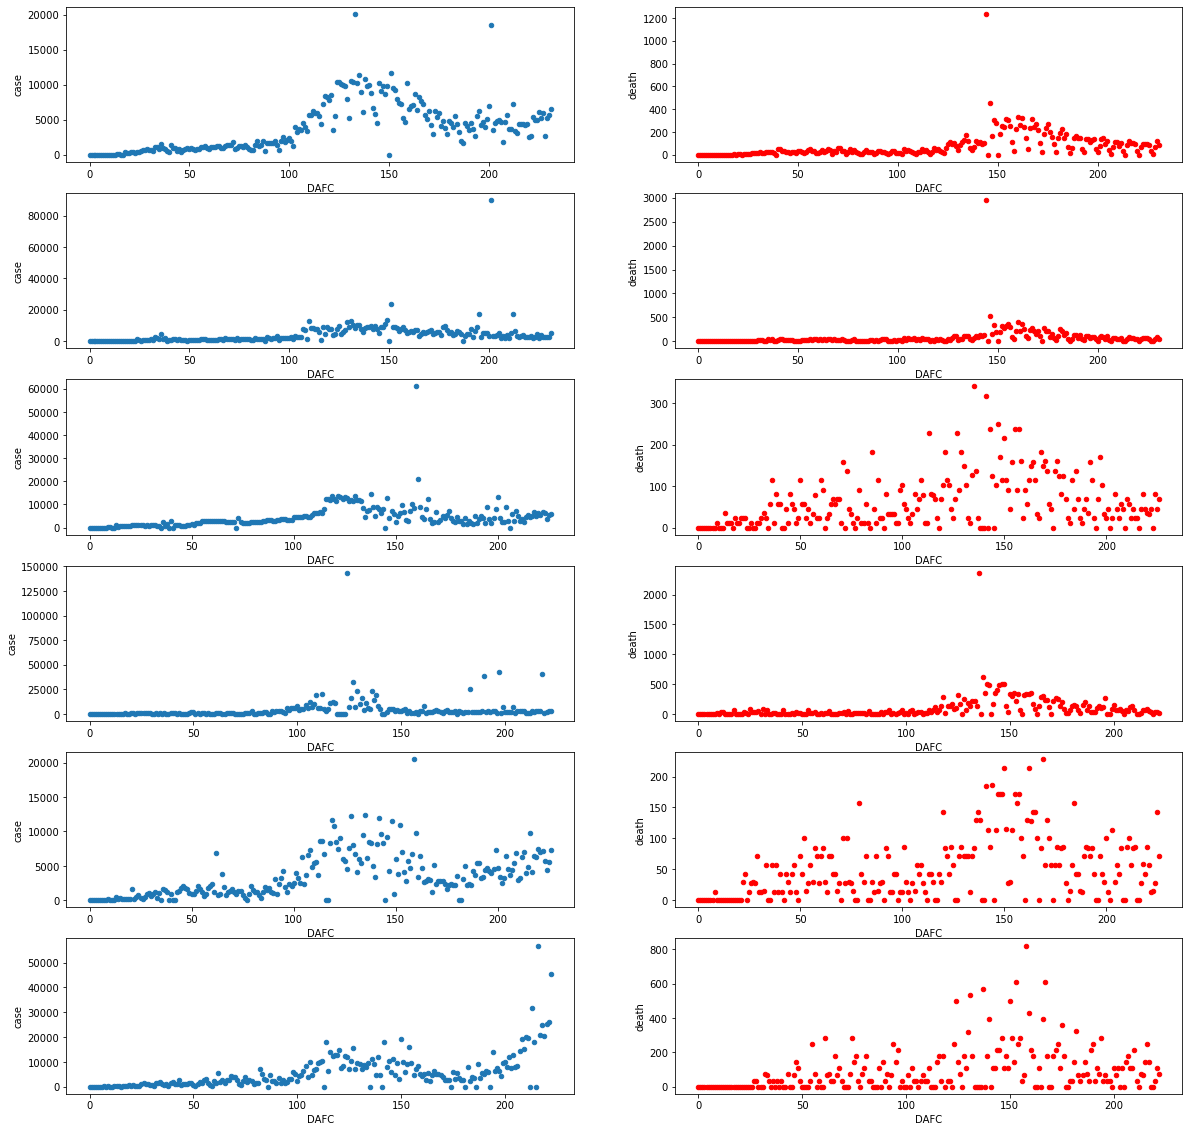

In [35]:
fig, axs=plt.subplots(6,2)
TX_case.plot(kind='scatter',x='DAFC',y='case',ax=axs[0,0],figsize=(20,20))
Harris.plot(kind='scatter',x='DAFC',y='case',ax=axs[1,0])
Dallas.plot(kind='scatter',x='DAFC',y='case',ax=axs[2,0])
Bexar.plot(kind='scatter',x='DAFC',y='case',ax=axs[3,0])
Tarrant.plot(kind='scatter',x='DAFC',y='case',ax=axs[4,0])
ElPaso.plot(kind='scatter',x='DAFC',y='case',ax=axs[5,0])

TX_case.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[0,1],figsize=(20,20))
Harris.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[1,1])
Dallas.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[2,1])
Bexar.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[3,1])
Tarrant.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[4,1])
ElPaso.plot(kind='scatter',color='red',x='DAFC',y='death',ax=axs[5,1])

###  Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state and its counties.

the confidentce internals for the linear model coefficents for state Texas
                    0            1
Intercept -410.342968  1018.928213
DAFC        25.106403    35.811578
the confidentce internals for the polynomial model(n=2) coefficents for state Texas
                          0            1
Intercept      -3272.547263 -1341.846098
DAFC              79.277544   117.892053
I(DAFC ** 2.0)    -0.375822    -0.214012
the confidentce internals for the polynomial model(n=5) coefficents for state Texas
                           0           1
Intercept      -2.364564e+03  639.082970
DAFC            6.153527e+01  326.268707
I(DAFC ** 2.0) -1.122523e+01   -4.085040
I(DAFC ** 3.0)  7.461515e-02    0.153176
I(DAFC ** 4.0) -8.251271e-04   -0.000450
I(DAFC ** 5.0)  8.673839e-07    0.000002


the confidentce internals for the linear model coefficents for state Harris
                     0            1
Intercept -1488.616561  1772.243689
DAFC         23.623773    48.047466
the confidentce

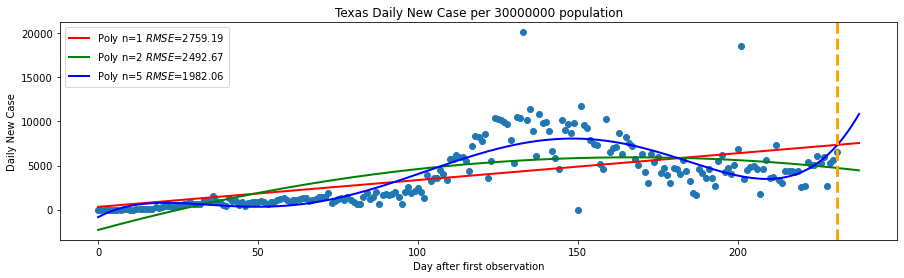

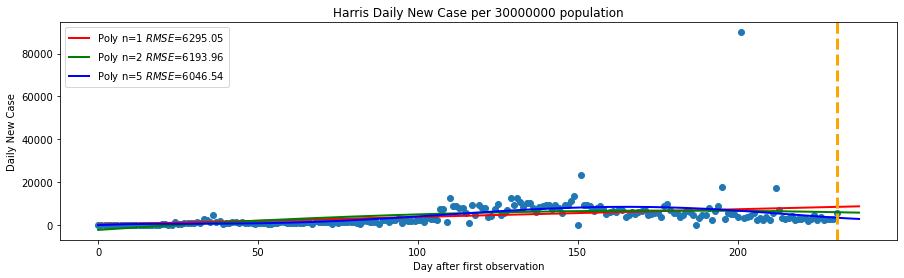

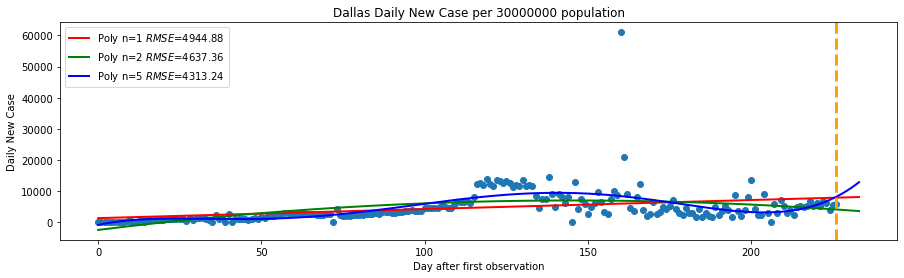

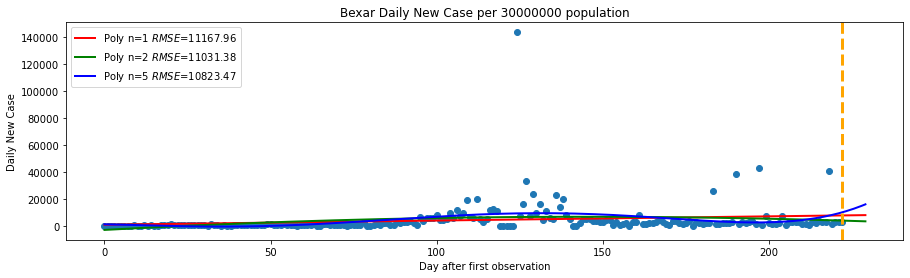

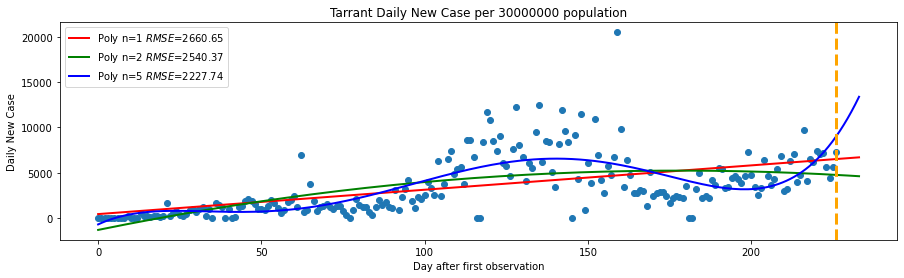

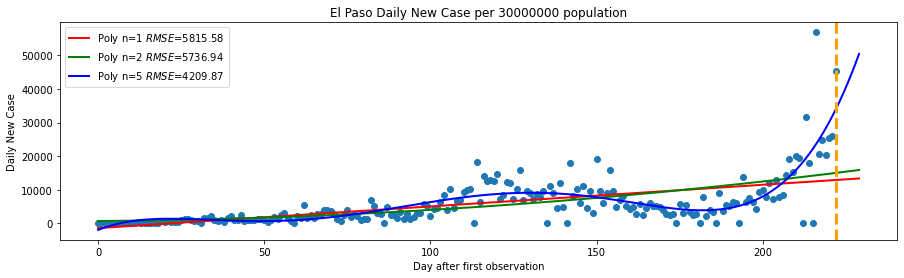

In [36]:
import statsmodels.formula.api as smf
from  statsmodels.tools.eval_measures import rmse
for idx,county in [('Texas',TX_case),('Harris',Harris),('Dallas',Dallas),('Bexar',Bexar),('Tarrant',Tarrant),('El Paso',ElPaso)]:
    plt.figure(figsize=(15, 4))
    plt.scatter(county.DAFC,county.case)
    #create a fitted model in linear and nonlinear
    case_poly1=smf.ols(formula='case ~ DAFC',data=county).fit()
    case_poly2 = smf.ols(formula='case ~ 1 + DAFC + I(DAFC ** 2.0)', data=county).fit()
    case_poly5  = smf.ols(formula='case ~ 1 + DAFC + I(DAFC ** 2.0)+I(DAFC ** 3.0)+I(DAFC ** 4.0)++I(DAFC ** 5.0)', data=county).fit()
    x=pd.DataFrame({'DAFC':np.linspace(county.DAFC.min(),county.DAFC.max()+7,200)})
    plt.plot(x.DAFC,case_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(county.case,case_poly1.predict(county.DAFC)))
    plt.plot(x.DAFC,case_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(county.case,case_poly2.predict(county.DAFC)))
    plt.plot(x.DAFC,case_poly5.predict(x),'b-',linewidth=2,label='Poly n=5 $RMSE$=%.2f'%rmse(county.case,case_poly5.predict(county.DAFC)))
    plt.axvline(county.DAFC.max(),linewidth=3,color='orange',linestyle='dashed')
    plt.title(idx+' Daily New Case per 30000000 population')
    plt.xlabel('Day after first observation')
    plt.ylabel('Daily New Case')
    plt.legend()      
    print('the confidentce internals for the linear model coefficents for state '+idx)    
    print (case_poly1.conf_int())
    print('the confidentce internals for the polynomial model(n=2) coefficents for state '+idx)    
    print (case_poly2.conf_int())
    print('the confidentce internals for the polynomial model(n=5) coefficents for state '+idx)    
    print (case_poly5.conf_int())
    print("\n")

the confidentce internals for the linear model coefficents for state Texas
                   0          1
Intercept -28.098447  24.747108
DAFC        0.483680   0.879491
the confidentce internals for the polynomial model(n=2) coefficents for state Texas
                        0         1
Intercept      -85.488015 -8.071423
DAFC             1.084037  2.632388
I(DAFC ** 2.0)  -0.008338 -0.001850


the confidentce internals for the linear model coefficents for state Harris
                   0          1
Intercept -46.990895  58.054237
DAFC        0.214074   1.000857
the confidentce internals for the polynomial model(n=2) coefficents for state Harris
                         0          1
Intercept      -140.714121  14.498008
DAFC              0.845927   3.950208
I(DAFC ** 2.0)   -0.014256  -0.001247


the confidentce internals for the linear model coefficents for state Dallas
                   0          1
Intercept  12.116800  43.385635
DAFC        0.172131   0.411509
the confidentce 

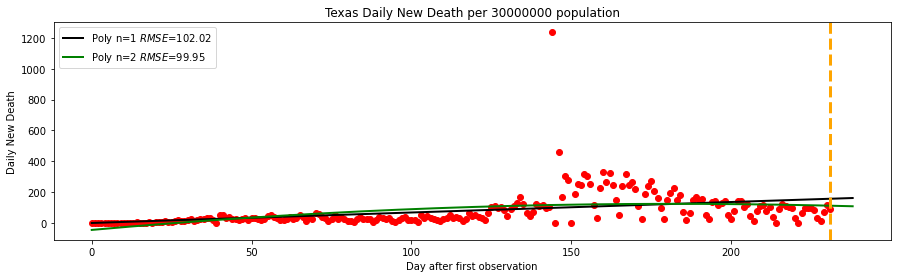

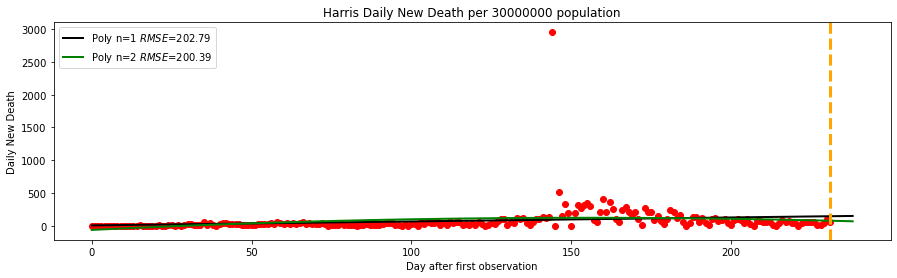

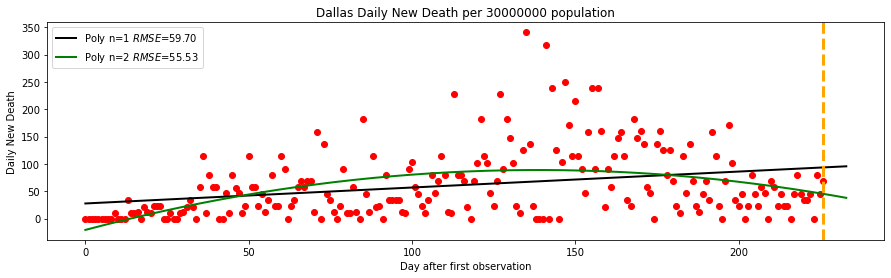

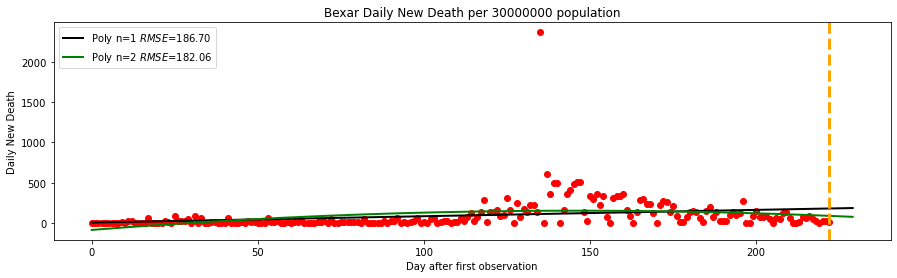

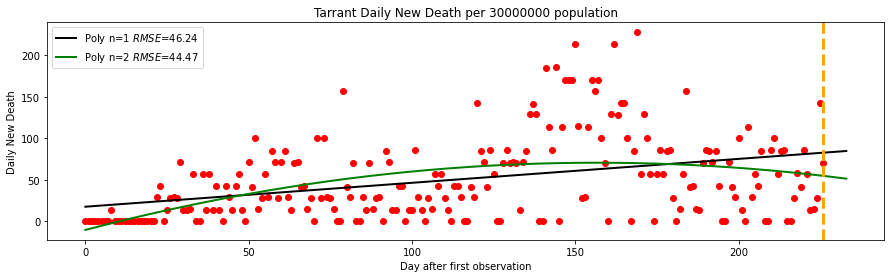

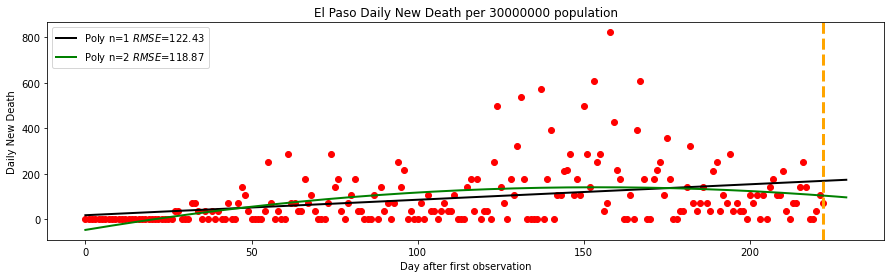

In [37]:
for idx,county in [('Texas',TX_case),('Harris',Harris),('Dallas',Dallas),('Bexar',Bexar),('Tarrant',Tarrant),('El Paso',ElPaso)]:
    plt.figure(figsize=(15, 4))
    plt.scatter(county.DAFC,county.death,color='red')
    #create a fitted model in linear and nonlinear
    death_poly1=smf.ols(formula='death ~ DAFC',data=county).fit()
    death_poly2 = smf.ols(formula='death ~ 1 + DAFC + I(DAFC ** 2.0)', data=county).fit()
    x=pd.DataFrame({'DAFC':np.linspace(county.DAFC.min(),county.DAFC.max()+7,200)})
    plt.plot(x.DAFC,death_poly1.predict(x),color='black',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(county.death,death_poly1.predict(county.DAFC)))
    plt.plot(x.DAFC,death_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(county.death,death_poly2.predict(county.DAFC)))
    plt.axvline(county.DAFC.max(),linewidth=3,color='orange',linestyle='dashed')
    plt.title(idx+' Daily New Death per 30000000 population')
    plt.xlabel('Day after first observation')
    plt.ylabel('Daily New Death')
    plt.legend()
    
    print('the confidentce internals for the linear model coefficents for state '+idx)    
    print (death_poly1.conf_int())
    print('the confidentce internals for the polynomial model(n=2) coefficents for state '+idx)    
    print (death_poly2.conf_int())
    print("\n")

### Identify which counties are most at risk.
- From the trend graph above, in my personal view, the polynomial regression model (n=5) fit the data better, because we could see for each counties and state, the trend has a peak around 130 days after first case occured and then goes lower and it appears to rebound at last. In the meantime, the RMSE of this predictor is also minimal.
 $$Y=\beta + \beta_1 x^1+\beta_2 x^2+\beta_3 x^3+\beta_4 x^4+\beta_5 x^5 $$

- I analysis the counties from two aspect 
     - the predict new case number, since sometimes even the growth rate is lower but it may be possible that this county has a high new case confirmed every day.
         - since we have already nomalize the data by populaton, we could predict using the stas predictor directly
     - the growth rate
       - the growth rate is the slope of the last rebound is $S$, so the county at highest risk will have the highest $S$
  $$S=\beta_1+\beta_2 x^1+3\beta_3 x^2+4\beta_4 x^3+5\beta_5 x^4 $$

In [38]:
for idx,county in [('Texas',TX_case),('Harris',Harris),('Dallas',Dallas),('Bexar',Bexar),('Tarrant',Tarrant),('El Paso',ElPaso)]:
    print ('The predict new case for the next 7 days of '+idx)
    x=pd.DataFrame({'DAFC':range(county.DAFC.max()+1,county.DAFC.max()+8)})
    case_poly5  = smf.ols(formula='case ~ 1 + DAFC + I(DAFC ** 2.0)+I(DAFC ** 3.0)+I(DAFC ** 4.0)++I(DAFC ** 5.0)', data=county).fit()
    print (case_poly5.predict(x))
    print ('The growth rate for the next 7 days of '+idx)    
    print(case_poly5.params[1]+case_poly5.params[2]*x+3*case_poly5.params[3]*(x**2)+4*case_poly5.params[4]*(x**3)+5*case_poly5.params[5]*(x**4))
    print('\n\n')

The predict new case for the next 7 days of Texas
0     7675.287915
1     8126.279432
2     8607.082643
3     9118.703257
4     9662.165115
5    10238.510334
6    10848.799447
dtype: float64
The growth rate for the next 7 days of Texas
          DAFC
0  2212.408137
1  2249.378122
2  2287.344798
3  2326.326224
4  2366.340605
5  2407.406288
6  2449.541761



The predict new case for the next 7 days of Harris
0    3256.766144
1    3167.836194
2    3082.191327
3    3000.071395
4    2921.721595
5    2847.392513
6    2777.340177
dtype: float64
The growth rate for the next 7 days of Harris
         DAFC
0  513.312399
1  519.081939
2  525.088674
3  531.337925
4  537.835062
5  544.585497
6  551.594691



The predict new case for the next 7 days of Dallas
0     8692.860735
1     9282.471429
2     9910.552879
3    10578.388802
4    11287.286025
5    12038.574676
6    12833.608362
dtype: float64
The growth rate for the next 7 days of Dallas
          DAFC
0  2533.131447
1  2579.612648
2  2627.3660

#### Fom above summary, we could see El Paso county is at most risk in terms of each aspect
### Utilize the hospital data to calculate the point of no return for a state.

In [39]:
hospital= pd.read_csv('../Data/Input/Definitive_Healthcare%3A_USA_Hospital_Beds.csv',)

In [40]:
hospital_=hospital.groupby(by='HQ_STATE').sum()

In [41]:
hospital_.head()

X            Y  OBJECTID  HQ_ZIP_CODE  STATE_FIPS  \
HQ_STATE                                                                 
AK        -4160.695076  1708.269904     73978      2790092        56.0   
AL       -10498.363941  3972.882908    195895      4347975       121.0   
AR       -10002.707922  3787.394791    221403      7809000       540.0   
AS         -170.685773   -14.290190      4254        96799         0.0   
AZ       -14750.458083  4422.658472    364485     11285845       528.0   

          CNTY_FIPS      FIPS  NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  \
HQ_STATE                                                             
AK           3171.0   59171.0             1832.0            1571.0   
AL           8573.0  129573.0            18611.0           15110.0   
AR           8816.0  548816.0            12473.0            9873.0   
AS              0.0       0.0              120.0             120.0   
AZ           1874.0  529874.0            18388.0           15798.0   

          NUM_ICU_BEDS  ADULT_ICU_BEDS  PEDI_ICU_BEDS  BED_UTILIZATION  \
HQ_STATE                                                                 
AK                 193             193           76.0         8.814418   
AL                1637            1637          569.0        52.522856   
AR                 914             914          247.0        42.324138   
AS                  21              21            0.0         0.000000   
AZ                1882            1882          532.0        56.848300   

          Potential_Increase_In_Bed_Capac  AVG_VENTILATOR_USAGE  
HQ_STATE                                                         
AK                                    261                  41.0  
AL                                   3501                 383.0  
AR                                   2600                 261.0  
AS                                      0                   2.0  
AZ                                   2590                 427.0

In [42]:
hospital_=hospital_['NUM_ICU_BEDS']
hospital_state=pd.DataFrame(hospital_)
hospital_state

NUM_ICU_BEDS
HQ_STATE              
AK                 193
AL                1637
AR                 914
AS                  21
AZ                1882
CA                8647
CO                1359
CT                 966
DC                 407
DE                 264
FL                6231
GA                3123
GU                  32
HI                 219
IA                 819
ID                 440
IL                3743
IN                2125
KS                1300
KY                1788
LA                2212
MA                1986
MD                1311
ME                 279
MI                2589
MN                1523
MO                2170
MP                   4
MS                1069
MT                 335
NC                2648
ND                 516
NE                 782
NH                 278
NJ                1758
NM                 468
NV                1015
NY                4230
OH                3725
OK                1475
OR                 838
PA                3929
PR                1139
RI                 375
SC                1253
SD                 392
TN                2364
TX                8719
UT                 716
VA                2022
VI                  19
VT                 151
WA                1685
WI                1586
WV                 677
WY                 165

In [43]:
death_state=death_raw.groupby(by='State').sum()

In [44]:
bed_utilization=hospital_state.merge(death_state,left_index=True,right_index=True)

In [45]:
bed_utilization

NUM_ICU_BEDS  countyFIPS  stateFIPS  1/22/20  1/23/20  1/24/20  1/25/20  \
AK           193       64610         62        0        0        0        0   
AL          1637       71489         68        0        0        0        0   
AR           914      380625        380        0        0        0        0   
AZ          1882       60208         64        0        0        0        0   
CA          8647      357364        360        0        0        0        0   
CO          1359      515983        520        0        0        0        0   
CT           966       72064         81        0        0        0        0   
DC           407       11001         11        0        0        0        0   
DE           264       30009         40        0        0        0        0   
FL          6231      808550        816        0        0        0        0   
GA          3123     2092677       2080        0        0        0        0   
HI           219       75025         90        0        0        0        0   
IA           819     1890801       1900        0        0        0        0   
ID           440      705936        720        0        0        0        0   
IL          3743     1744404       1751        0        0        0        0   
IN          2125     1664464       1674        0        0        0        0   
KS          1300     2111025       2120        0        0        0        0   
KY          1788     2534400       2541        0        0        0        0   
LA          2212     1412096       1430        0        0        0        0   
MA          1986      350196        375        0        0        0        0   
MD          1311      577079        600        0        0        0        0   
ME           279      368256        391        0        0        0        0   
MI          2589     2164889       2184        0        0        0        0   
MN          1523     2356569       2376        0        0        0        0   
MO          2170     3348537       3364        0        0        0        0   
MS          1069     2302724       2324        0        0        0        0   
MT           335     1683136       1710        0        0        0        0   
NC          2648     3710000       3737        0        0        0        0   
ND           516     2016809       2052        0        0        0        0   
NE           782     2891649       2914        0        0        0        0   
NH           278      330100        363        0        0        0        0   
NJ          1758      714441        748        0        0        0        0   
NM           468     1155995       1190        0        0        0        0   
NV          1015      544774        576        0        0        0        0   
NY          4230     2235845       2304        0        0        0        0   
OH          3725     3439744       3471        0        0        0        0   
OK          1475     3085929       3120        0        0        0        0   
OR           838     1477296       1517        0        0        0        0   
PA          3929     2818489       2856        0        0        0        0   
RI           375      220025        264        0        0        0        0   
SC          1253     2072116       2115        0        0        0        0   
SD           392     3040485       3082        0        0        0        0   
TN          2364     4474025       4512        0        0        0        0   
TX          8719    12256516      12240        0        0        0        0   
UT           716     1421841       1470        0        0        0        0   
VA          2022     6818111       6834        0        0        0        0   
VT           151      700196        750        0        0        0        0   
WA          1685     2068521       2120        0        0        0        0   
WI          1586     3965119       4015        0        0        0        0   
WV           677     2973025       3024        0      

In [46]:
for column in bed_utilization.columns[3:]:
    bed_utilization[column]=bed_utilization[column]/bed_utilization['NUM_ICU_BEDS']

In [47]:
bed_utilization

NUM_ICU_BEDS  countyFIPS  stateFIPS  1/22/20  1/23/20  1/24/20  1/25/20  \
AK           193       64610         62      0.0      0.0      0.0      0.0   
AL          1637       71489         68      0.0      0.0      0.0      0.0   
AR           914      380625        380      0.0      0.0      0.0      0.0   
AZ          1882       60208         64      0.0      0.0      0.0      0.0   
CA          8647      357364        360      0.0      0.0      0.0      0.0   
CO          1359      515983        520      0.0      0.0      0.0      0.0   
CT           966       72064         81      0.0      0.0      0.0      0.0   
DC           407       11001         11      0.0      0.0      0.0      0.0   
DE           264       30009         40      0.0      0.0      0.0      0.0   
FL          6231      808550        816      0.0      0.0      0.0      0.0   
GA          3123     2092677       2080      0.0      0.0      0.0      0.0   
HI           219       75025         90      0.0      0.0      0.0      0.0   
IA           819     1890801       1900      0.0      0.0      0.0      0.0   
ID           440      705936        720      0.0      0.0      0.0      0.0   
IL          3743     1744404       1751      0.0      0.0      0.0      0.0   
IN          2125     1664464       1674      0.0      0.0      0.0      0.0   
KS          1300     2111025       2120      0.0      0.0      0.0      0.0   
KY          1788     2534400       2541      0.0      0.0      0.0      0.0   
LA          2212     1412096       1430      0.0      0.0      0.0      0.0   
MA          1986      350196        375      0.0      0.0      0.0      0.0   
MD          1311      577079        600      0.0      0.0      0.0      0.0   
ME           279      368256        391      0.0      0.0      0.0      0.0   
MI          2589     2164889       2184      0.0      0.0      0.0      0.0   
MN          1523     2356569       2376      0.0      0.0      0.0      0.0   
MO          2170     3348537       3364      0.0      0.0      0.0      0.0   
MS          1069     2302724       2324      0.0      0.0      0.0      0.0   
MT           335     1683136       1710      0.0      0.0      0.0      0.0   
NC          2648     3710000       3737      0.0      0.0      0.0      0.0   
ND           516     2016809       2052      0.0      0.0      0.0      0.0   
NE           782     2891649       2914      0.0      0.0      0.0      0.0   
NH           278      330100        363      0.0      0.0      0.0      0.0   
NJ          1758      714441        748      0.0      0.0      0.0      0.0   
NM           468     1155995       1190      0.0      0.0      0.0      0.0   
NV          1015      544774        576      0.0      0.0      0.0      0.0   
NY          4230     2235845       2304      0.0      0.0      0.0      0.0   
OH          3725     3439744       3471      0.0      0.0      0.0      0.0   
OK          1475     3085929       3120      0.0      0.0      0.0      0.0   
OR           838     1477296       1517      0.0      0.0      0.0      0.0   
PA          3929     2818489       2856      0.0      0.0      0.0      0.0   
RI           375      220025        264      0.0      0.0      0.0      0.0   
SC          1253     2072116       2115      0.0      0.0      0.0      0.0   
SD           392     3040485       3082      0.0      0.0      0.0      0.0   
TN          2364     4474025       4512      0.0      0.0      0.0      0.0   
TX          8719    12256516      12240      0.0      0.0      0.0      0.0   
UT           716     1421841       1470      0.0      0.0      0.0      0.0   
VA          2022     6818111       6834      0.0      0.0      0.0      0.0   
VT           151      700196        750      0.0      0.0      0.0      0.0   
WA          1685     2068521       2120      0.0      0.0      0.0      0.0   
WI          1586     3965119       4015      0.0      0.0      0.0      0.0   
WV           677     2973025       3024      0.0      

In [48]:
bed_utilization=bed_utilization[bed_utilization.columns[3:]]
bed_utilization.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
AK      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
AL      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
AR      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
AZ      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CA      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    1/30/20  1/31/20  ...  10/13/20  10/14/20  10/15/20  10/16/20  10/17/20  \
AK      0.0      0.0  ...  0.305699  0.321244  0.326425  0.331606  0.341969   
AL      0.0      0.0  ...  1.627978  1.653024  1.682957  1.701283  1.702505   
AR      0.0      0.0  ...  1.751641  1.776805  1.789934  1.812910  1.841357   
AZ      0.0      0.0  ...  3.064293  3.066950  3.075983  3.085016  3.093518   
CA      0.0      0.0  ...  1.928646  1.939517  1.948653  1.956748  1.960680   

    10/18/20  10/19/20  10/20/20  10/21/20  10/22/20  
AK  0.341969  0.341969  0.347150  0.352332  0.352332  
AL  1.702505  1.703115  1.712889  1.727550  1.736714  
AR  1.862144  1.873085  1.889497  1.915755  1.938731  
AZ  3.096174  3.097768  3.101488  3.110521  3.113177  
CA  1.964843  1.967388  1.971666  1.990748  1.999190  

[5 rows x 275 columns]

In [49]:
bed_utilization=bed_utilization.T

In [50]:
bed_utilization

AK        AL        AR        AZ        CA        CO  \
1/22/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/23/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/24/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/25/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/26/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
10/18/20  0.341969  1.702505  1.862144  3.096174  1.964843  1.601177   
10/19/20  0.341969  1.703115  1.873085  3.097768  1.967388  1.604121   
10/20/20  0.347150  1.712889  1.889497  3.101488  1.971666  1.605592   
10/21/20  0.352332  1.727550  1.915755  3.110521  1.990748  1.614422   
10/22/20  0.352332  1.736714  1.938731  3.113177  1.999190  1.617366   

                CT        DC        DE        FL  ...        SD        TN  \
1/22/20   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1/23/20   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1/24/20   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1/25/20   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1/26/20   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
...            ...       ...       ...       ...  ...       ...       ...   
10/18/20  4.701863  1.574939  2.518939  2.562350  ...  0.823980  1.229695   
10/19/20  4.713251  1.574939  2.518939  2.570695  ...  0.823980  1.235195   
10/20/20  4.719462  1.577396  2.530303  2.584497  ...  0.841837  1.247462   
10/21/20  4.727743  1.577396  2.537879  2.600385  ...  0.849490  1.255922   
10/22/20  4.729814  1.577396  2.553030  2.610656  ...  0.885204  1.273689   

                TX        UT        VA        VT        WA        WI  \
1/22/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/23/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/24/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/25/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1/26/20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
10/18/20  1.950338  0.759777  1.697329  0.384106  1.328783  0.992434   
10/19/20  1.951256  0.763966  1.708704  0.384106  1.338872  0.992434   
10/20/20  1.958711  0.770950  1.722552  0.384106  1.351335  0.992434   
10/21/20  1.971786  0.779330  1.738378  0.384106  1.353709  0.992434   
10/22/20  1.981535  0.787709  1.742829  0.384106  1.358457  0.992434   

                WV        WY  
1/22/20   0.000000  0.000000  
1/23/20   0.000000  0.000000  
1/24/20   0.000000  0.000000  
1/25/20   0.000000  0.000000  
1/26/20   0.000000  0.000000  
...            ...       ...  
10/18/20  0.589365  0.345455  
10/19/20  0.589365  0.345455  
10/20/20  0.602659  0.369697  
10/21/20  0.610044  0.369697  
10/22/20  0.617430  0.369697  

[275 rows x 51 columns]

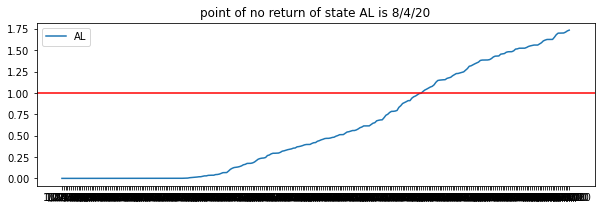

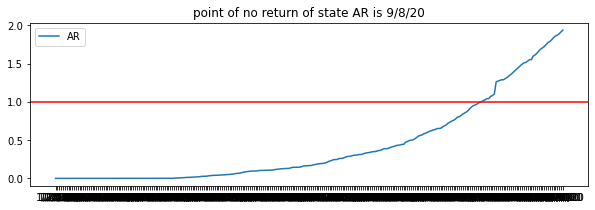

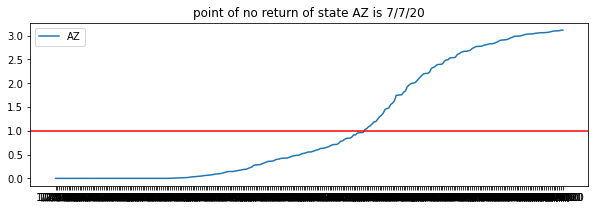

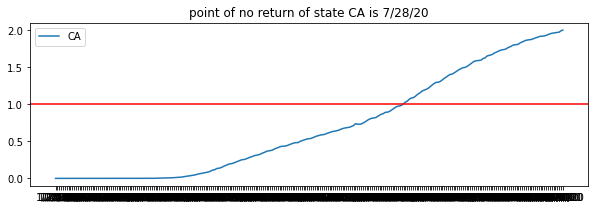

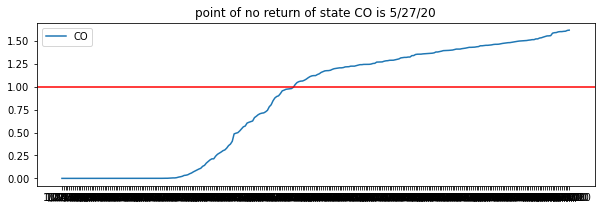

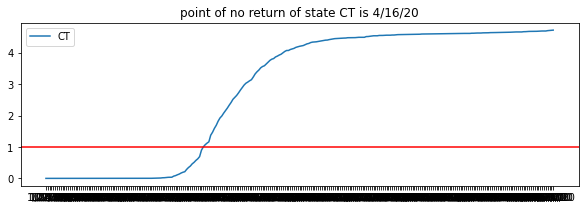

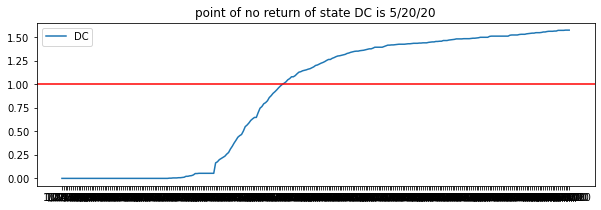

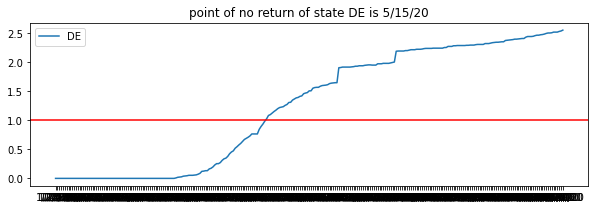

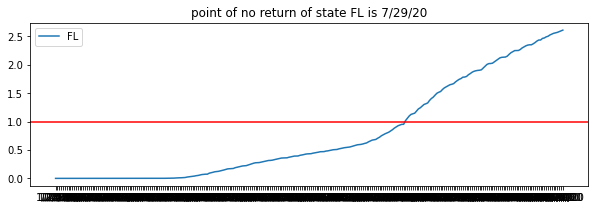

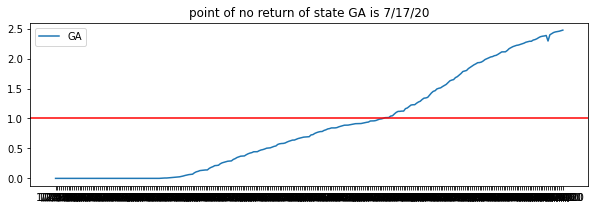

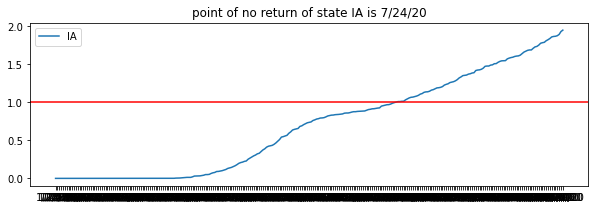

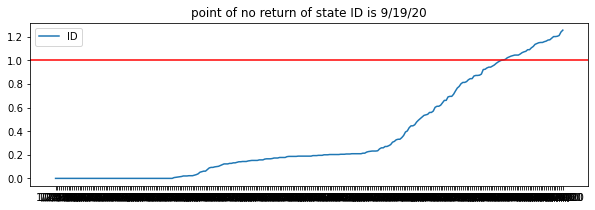

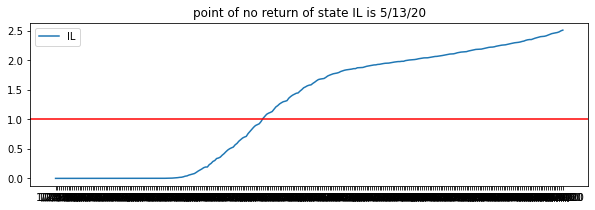

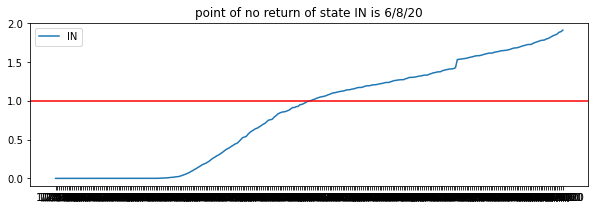

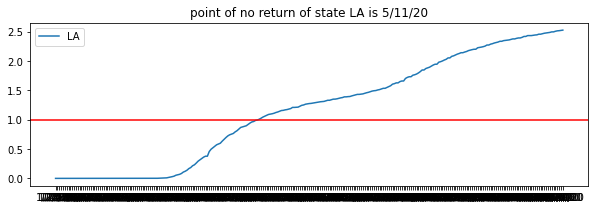

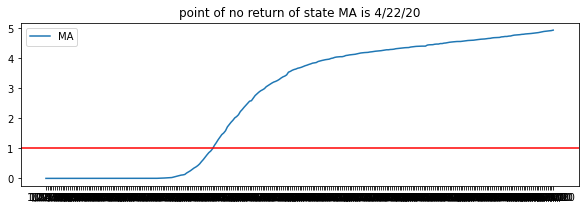

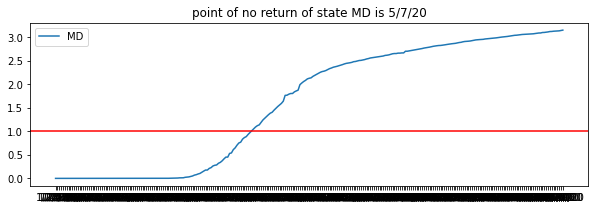

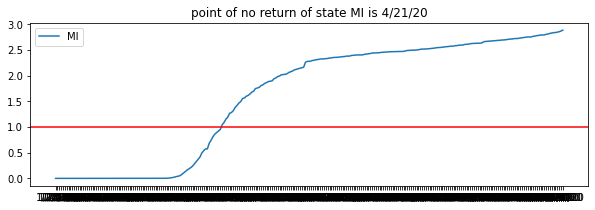

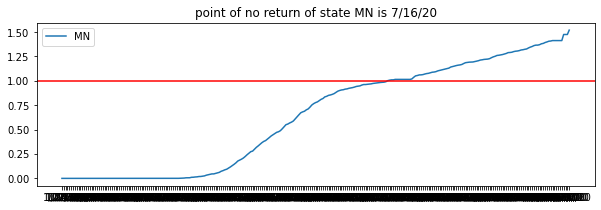

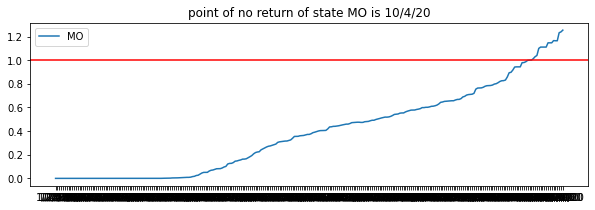

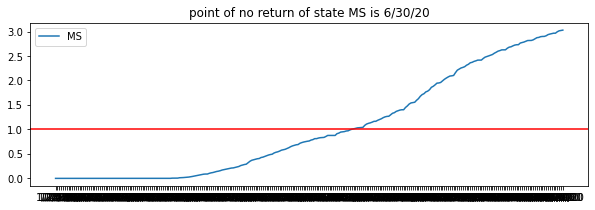

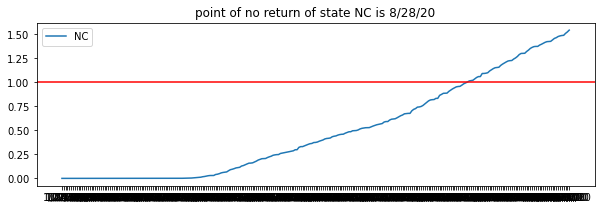

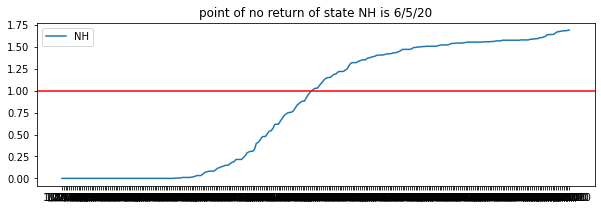

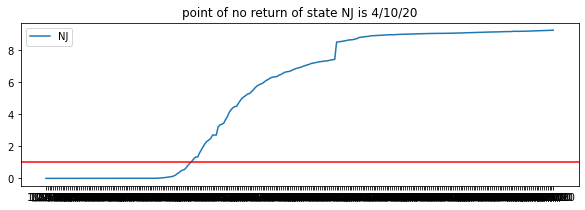

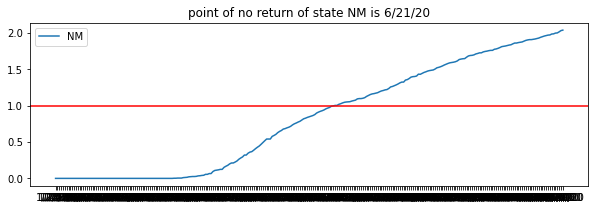

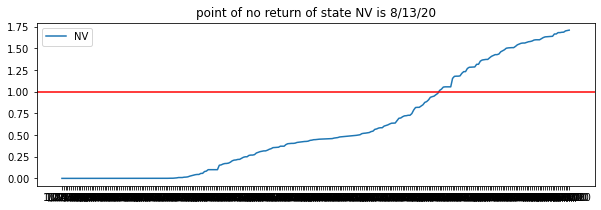

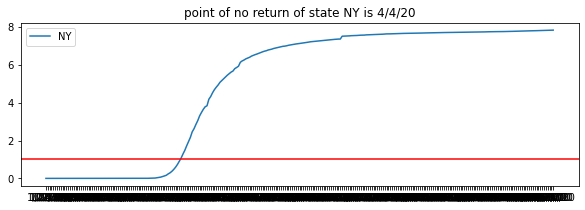

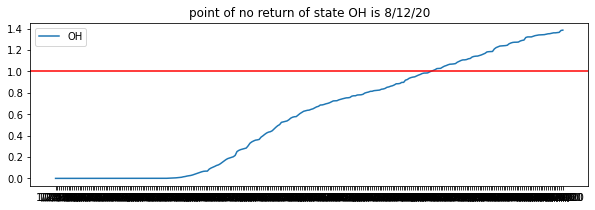

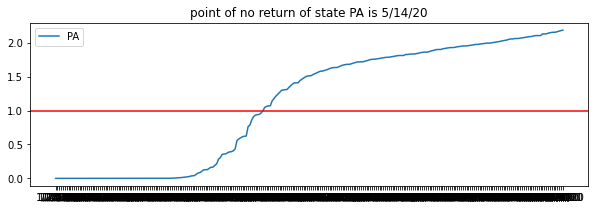

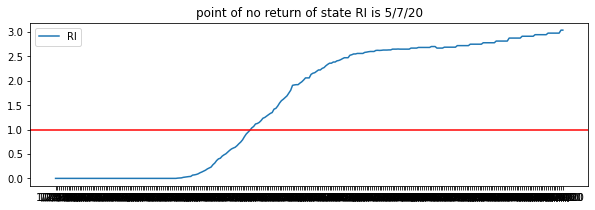

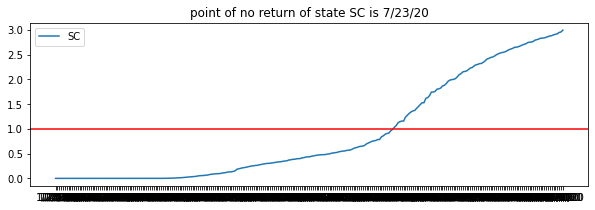

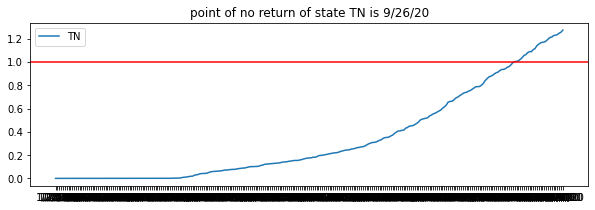

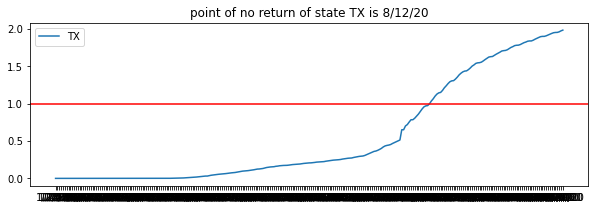

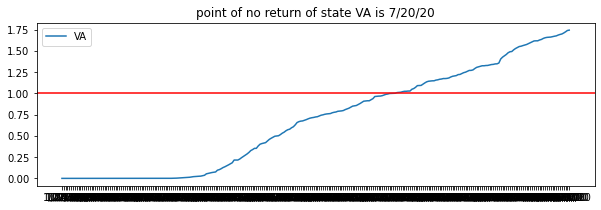

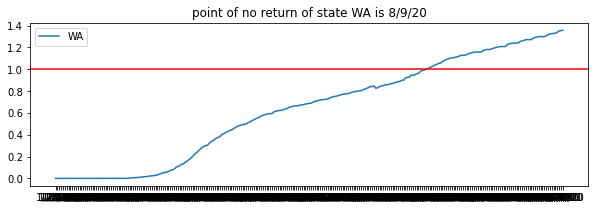

In [51]:
import warnings
warnings.filterwarnings('ignore')
for column in bed_utilization.columns[:]:
    tem=bed_utilization[bed_utilization[column]>=1][column]
    if(len(tem)>0):        
        plt.figure(figsize=(10,3))
        plt.plot(bed_utilization.index,bed_utilization[column],label=column)
        plt.axhline(1,color='red')
        plt.title('point of no return of state '+column+' is '+tem.index[0])
        plt.legend()

 #### The hospital bed of the rest states has not reached their maximum capacity. 
 ### Utilize decision tree, random forest, and ARIMA (https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) based models to compare and contrast the performance of each.

In [52]:
TX_case.head()

case  death  DAFC
3/5/20   3.0    0.0     0
3/6/20   1.0    0.0     1
3/7/20   4.0    0.0     2
3/8/20   3.0    0.0     3
3/9/20   5.0    0.0     4

In [53]:
TX_case['date']=TX_case.index
TX_case

case  death  DAFC      date
3/5/20       3.0    0.0     0    3/5/20
3/6/20       1.0    0.0     1    3/6/20
3/7/20       4.0    0.0     2    3/7/20
3/8/20       3.0    0.0     3    3/8/20
3/9/20       5.0    0.0     4    3/9/20
...          ...    ...   ...       ...
10/18/20  5990.0   31.0   227  10/18/20
10/19/20  2645.0    9.0   228  10/19/20
10/20/20  5239.0   67.0   229  10/20/20
10/21/20  5639.0  118.0   230  10/21/20
10/22/20  6586.0   88.0   231  10/22/20

[232 rows x 4 columns]

In [54]:
week=1
date=[]
week_case=[]
for x in range(0,len(TX_case),7): 
    tem=0
    date.append(TX_case.iloc[x][3])
    for y in range(7):   
        if(x+y<len(TX_case)):
            tem=tem+TX_case.iloc[x+y][0]
    week_case.append(tem)
    week=week+1
    

In [55]:
week_data=pd.DataFrame({'week':range(1,len(week_case)+1),'case':week_case,'date':date})
week_data.head()

week    case     date
0     1    21.0   3/5/20
1     2    88.0  3/12/20
2     3  1143.0  3/19/20
3     4  3163.0  3/26/20
4     5  5639.0   4/2/20

the confidentce internals for the linear model coefficents for state TX
                     0             1
Intercept -8814.122431  16610.293554
week        633.997025   1901.263784
the confidentce internals for the polynomial model(n=2) coefficents for state TX
                           0            1
Intercept      -37579.235072 -5415.726827
week             3381.667698  7618.781949
I(week ** 2.0)   -179.648835   -62.213703
the confidentce internals for the polynomial model(n=5) coefficents for state TX
                           0             1
Intercept      -34473.117165  26171.733652
week           -10733.168072  22468.775908
I(week ** 2.0)  -4437.387080   1232.827447
I(week ** 3.0)    -32.656806    371.360539
I(week ** 4.0)    -12.783471     -0.132161
I(week ** 5.0)      0.008511      0.152428




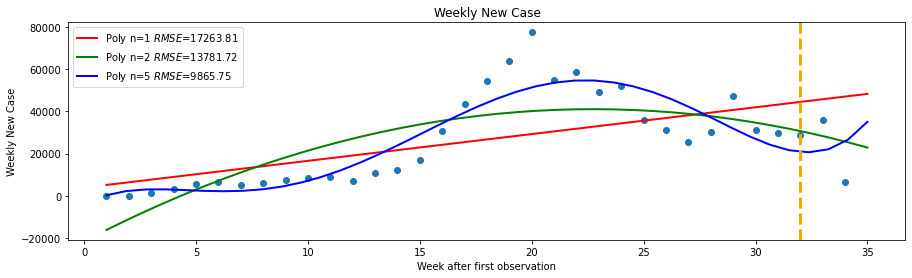

In [56]:
plt.figure(figsize=(15, 4))
plt.scatter(week_data.week,week_data.case)
#create a fitted model in linear and nonlinear
case_poly1=smf.ols(formula='case ~ week',data=week_data).fit()
case_poly2 = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)', data=week_data).fit()
case_poly5  = smf.ols(formula='case ~ 1 + week + I(week ** 2.0)+I(week ** 3.0)+I(week ** 4.0)++I(week ** 5.0)', data=week_data).fit()
x=pd.DataFrame({'week':np.linspace(week_data.week.min(),week_data.week.max()+1,40)})
plt.plot(x.week,case_poly1.predict(x),'r-',linewidth=2,label='Poly n=1 $RMSE$=%.2f'%rmse(week_data.case,case_poly1.predict(week_data.week)))
plt.plot(x.week,case_poly2.predict(x),'g-',linewidth=2,label='Poly n=2 $RMSE$=%.2f'%rmse(week_data.case,case_poly2.predict(week_data.week)))
plt.plot(x.week,case_poly5.predict(x),'b-',linewidth=2,label='Poly n=5 $RMSE$=%.2f'%rmse(week_data.case,case_poly5.predict(week_data.week)))
plt.axvline(week_data.week.max()-2,linewidth=3,color='orange',linestyle='dashed')
plt.title('Weekly New Case')
plt.xlabel('Week after first observation')
plt.ylabel('Weekly New Case')
plt.legend()
print('the confidentce internals for the linear model coefficents for state TX')    
print (case_poly1.conf_int())
print('the confidentce internals for the polynomial model(n=2) coefficents for state TX')    
print (case_poly2.conf_int())
print('the confidentce internals for the polynomial model(n=5) coefficents for state TX')    
print (case_poly5.conf_int())
print("\n")

In [57]:
y_test=week_data.case[-2:]
y_week=week_data.week[-2:]

In [58]:
y_pred=case_poly5.predict(y_week)

In [59]:
mean_squared_error(y_test,y_pred,squared=False)

16987.90766371605

#### the RSME for poly5 is 16987
#### next, we will build the decision tree model

In [60]:
from sklearn.model_selection import train_test_split
import sklearn.tree

In [61]:
X= week_data['week'].values.reshape(-1,1)
y = week_data['case'].values.reshape(-1,1)
size=int(len(X)-2)
X_train, X_test=X[0:size],X[size:len(X)]
y_train,y_test=y[0:size],y[size:len(X)]

In [62]:
dt = sklearn.tree.DecisionTreeRegressor()

In [63]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

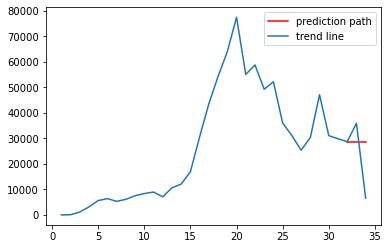

In [64]:
plt.figure()
plt.plot(np.insert(X_test,0,[32],0),np.insert(y_pred,0,[28697],0),color='red',label='prediction path')
plt.plot(week_data.week,week_data.case,label='trend line')
plt.legend()
plt.show()

In [65]:
mean_squared_error(y_test,y_pred,squared=False)

16449.676015046618

In [66]:
y=dt.predict([[35]])

In [67]:
y

array([28697.])

#### the RSME for decision tree is 16449
#### next, we will build the ramdom forest model

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20,max_depth=15,n_jobs=5)


rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=20, n_jobs=5)

In [69]:
y_predrft = rfr.predict(X_test)

In [70]:
mean_squared_error(y_test,y_predrft,squared=False)

17247.28032502516

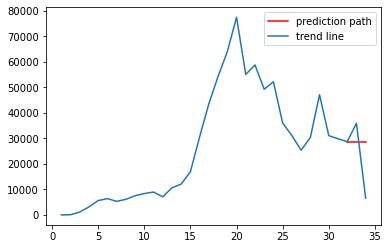

In [71]:
plt.plot(np.insert(X_test,0,[32],0),np.insert(y_pred,0,[28697],0),color='red',label='prediction path')
plt.plot(week_data.week,week_data.case,label='trend line')
plt.legend()
plt.show()

#### the RSME for ramdom forest model is 16725
#### next, we will build the ARIMA model

In [72]:
from statsmodels.tsa.arima_model import ARIMA
sss=pd.to_datetime(week_data.date)

In [73]:
data_ariam=week_data['case']
data_ariam.index=sss

In [74]:
data_ariam

date
2020-03-05       21.0
2020-03-12       88.0
2020-03-19     1143.0
2020-03-26     3163.0
2020-04-02     5639.0
2020-04-09     6413.0
2020-04-16     5323.0
2020-04-23     6117.0
2020-04-30     7524.0
2020-05-07     8387.0
2020-05-14     8984.0
2020-05-21     7121.0
2020-05-28    10622.0
2020-06-04    12113.0
2020-06-11    16949.0
2020-06-18    30617.0
2020-06-25    43574.0
2020-07-02    54304.0
2020-07-09    63963.0
2020-07-16    77453.0
2020-07-23    55053.0
2020-07-30    58758.0
2020-08-06    49262.0
2020-08-13    52164.0
2020-08-20    36012.0
2020-08-27    31100.0
2020-09-03    25357.0
2020-09-10    30302.0
2020-09-17    47099.0
2020-09-24    31067.0
2020-10-01    29872.0
2020-10-08    28697.0
2020-10-15    35928.0
2020-10-22     6586.0
Name: case, dtype: float64

predicted=30660.729106,expected=35928.000000
predicted=36006.848286,expected=6586.000000
Test RMSE: 21134.456


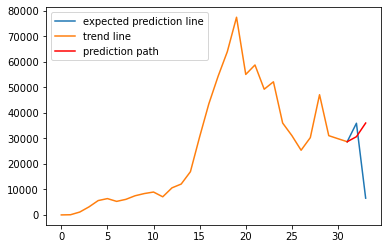

In [75]:
X=data_ariam.values
size=int(len(X)-2)
train,test=X[0:size],X[size:len(X)]
history=[x for x in train]
predictions=list()
for t in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f,expected=%f' %(yhat,obs))
error=mean_squared_error(test,predictions,squared=False)
print('Test RMSE: %.3f'% error)
plt.plot(range(len(train)-1,len(train)+2),np.insert(test,0,[28697],0),label='expected prediction line')
plt.plot(train,label='trend line')
plt.plot(range(len(train)-1,len(train)+2),np.insert(predictions,0,[28697],0),label='prediction path', color='red')
plt.legend()
plt.show()

####  the RSME for ARIMA model is 21134
### Use 5 different variables from the enrichment data to predict the spread rate (cases and deaths) of COVID-19 in a county.

In [76]:
enrich_datas=pd.read_csv("../Data/Input/ACS Economic Dataset/ACSDP5Y2018.DP03_data_with_overlays_2020-09-22T225755.csv",na_values=["(X)"],skiprows=[1],index_col='GEO_ID')
enrich_datas_info=pd.read_csv("../Data/Input/ACS Economic Dataset/ACSDP5Y2018.DP03_metadata_2020-09-22T225755.csv",index_col=0,header=None)

In [77]:
#display the columns in full text
pd.set_option("display.max_colwidth", -1)

In [78]:
enrich_datas.head()

NAME  DP03_0001E  DP03_0001M  DP03_0001PE  \
GEO_ID                                                                         
0500000US01001  Autauga County, Alabama  43368.0     203.0       43368.0       
0500000US01003  Baldwin County, Alabama  167712.0    321.0       167712.0      
0500000US01005  Barbour County, Alabama  20948.0     82.0        20948.0       
0500000US01007  Bibb County, Alabama     18470.0     132.0       18470.0       
0500000US01009  Blount County, Alabama   45915.0     159.0       45915.0       

                DP03_0001PM  DP03_0002E  DP03_0002M  DP03_0002PE  DP03_0002PM  \
GEO_ID                                                                          
0500000US01001 NaN           25736.0     653.0       59.3         1.6           
0500000US01003 NaN           98030.0     1549.0      58.5         0.9           
0500000US01005 NaN           9638.0      434.0       46.0         2.0           
0500000US01007 NaN           8757.0      521.0       47.4         2.8           
0500000US01009 NaN           22306.0     734.0       48.6         1.6           

                DP03_0003E  ...  DP03_0135PE  DP03_0135PM  DP03_0136E  \
GEO_ID                      ...                                         
0500000US01001  25189.0     ...  8.7          2.4         NaN           
0500000US01003  97722.0     ...  8.0          1.1         NaN           
0500000US01005  9638.0      ...  16.2         3.4         NaN           
0500000US01007  8757.0      ...  8.1          3.1         NaN           
0500000US01009  22255.0     ...  10.1         2.1         NaN           

                DP03_0136M  DP03_0136PE  DP03_0136PM  DP03_0137E  DP03_0137M  \
GEO_ID                                                                         
0500000US01001 NaN          14.0         2.4         NaN         NaN           
0500000US01003 NaN          7.9          1.0         NaN         NaN           
0500000US01005 NaN          27.8         3.4         NaN         NaN           
0500000US01007 NaN          11.3         4.0         NaN         NaN           
0500000US01009 NaN          12.2         2.0         NaN         NaN           

                DP03_0137PE  DP03_0137PM  
GEO_ID                                    
0500000US01001  24.3         3.6          
0500000US01003  23.2         2.1          
0500000US01005  34.4         5.1          
0500000US01007  31.9         6.1          
0500000US01009  30.4         4.3          

[5 rows x 549 columns]

In [79]:
datas_info_selected=enrich_datas_info.loc[["DP03_0001E","DP03_0024E","DP03_0026E","DP03_0027E","DP03_0028E","DP03_0029E","DP03_0030E","DP03_0031E","DP03_0075E","DP03_0076E","DP03_0077E","DP03_0078E","DP03_0079E","DP03_0080E","DP03_0081E","DP03_0082E","DP03_0083E","DP03_0084E","DP03_0085E","DP03_0095E","DP03_0096E","DP03_0097E","DP03_0098E","DP03_0099E"]]
datas_info_selected

1
0                                                                                                                                                       
DP03_0001E  Estimate!!EMPLOYMENT STATUS!!Population 16 years and over                                                                                   
DP03_0024E  Estimate!!COMMUTING TO WORK!!Workers 16 years and over!!Worked at home                                                                      
DP03_0026E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over                                                                        
DP03_0027E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations                   
DP03_0028E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations                                                   
DP03_0029E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Sales and office occupations                                          
DP03_0030E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations          
DP03_0031E  Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations           
DP03_0075E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families                                                                
DP03_0076E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!Less than $10,000                                             
DP03_0077E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999                                            
DP03_0078E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$15,000 to $24,999                                            
DP03_0079E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$25,000 to $34,999                                            
DP03_0080E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$35,000 to $49,999                                            
DP03_0081E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$50,000 to $74,999                                            
DP03_0082E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$75,000 to $99,999                                            
DP03_0083E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$100,000 to $149,999                                          
DP03_0084E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$150,000 to $199,999                                          
DP03_0085E  Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!!$200,000 or more                                              
DP03_0095E  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population                                                               
DP03_0096E  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage                               
DP03_0097E  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With private health insurance
DP03_0098E  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage         
DP03_0099E  Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!No health insurance coverage

- I choose the 
    - DP03_0001E	Estimate!!EMPLOYMENT STATUS!!Population 16 years and over
    - DP03_0028E	Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations
    - DP03_0080E	Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!! 35,000洧노洧녶 49,999
    - DP03_0084E	Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!! 150,000洧노洧녶 199,999
    - DP03_0098E	Estimate!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population!!With health insurance coverage!!With public coverage

In [80]:
df=enrich_datas[["DP03_0001E","DP03_0027E","DP03_0080E","DP03_0084E","DP03_0098E"]]
df

DP03_0001E  DP03_0027E  DP03_0080E  DP03_0084E  DP03_0098E
GEO_ID                                                                    
0500000US01001  43368.0     9336.0      1622.0      1115.0      18191     
0500000US01003  167712.0    33923.0     6469.0      4068.0      72322     
0500000US01005  20948.0     2261.0      998.0       111.0       11508     
0500000US01007  18470.0     1775.0      824.0       213.0       7748      
0500000US01009  45915.0     6385.0      2305.0      647.0       19752     
...                 ...        ...        ...         ...        ...      
0500000US72145  43815.0     4179.0      1468.0      83.0        33744     
0500000US72147  7042.0      609.0       191.0       0.0         5780      
0500000US72149  18663.0     1578.0      833.0       17.0        15701     
0500000US72151  28146.0     1969.0      802.0       11.0        24065     
0500000US72153  30226.0     3077.0      1004.0      33.0        25239     

[3220 rows x 5 columns]

In [81]:
TX_case_enrich=TX_case_popu.copy()
TX_death_enrich=TX_death_popu.copy()

In [82]:
TX_case_enrich.head()

countyFIPS_x    County Name_x State_x  population  countyFIPS_y  \
2569  48001         Anderson County  TX      57735       48001          
2570  48003         Andrews County   TX      18705       48003          
2571  48005         Angelina County  TX      86715       48005          
2572  48007         Aransas County   TX      23510       48007          
2573  48009         Archer County    TX      8553        48009          

        County Name_y State_y  stateFIPS  1/22/20  1/23/20  ...  10/13/20  \
2569  Anderson County  TX      48         0        0        ...  2885       
2570  Andrews County   TX      48         0        0        ...  518        
2571  Angelina County  TX      48         0        0        ...  2221       
2572  Aransas County   TX      48         0        0        ...  340        
2573  Archer County    TX      48         0        0        ...  101        

      10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
2569  2885      2903      2906      2909      2909      2909      2920       
2570  518       518       547       547       547       547       549        
2571  2221      2221      2251      2251      2251      2251      2251       
2572  340       340       340       340       340       340       340        
2573  103       105       106       114       114       114       114        

      10/21/20  10/22/20  
2569  2922      2934      
2570  567       567       
2571  2277      2277      
2572  340       340       
2573  133       133       

[5 rows x 283 columns]

In [83]:
new_id = lambda x: "0500000US"+str(x).zfill(5)
TX_case_enrich['countyFIPS_x']=TX_case_enrich['countyFIPS_x'].apply(new_id)
TX_death_enrich['countyFIPS_x']=TX_death_enrich['countyFIPS_x'].apply(new_id)

In [84]:
TX_enrich=df.merge(TX_case_enrich,left_index=True,right_on='countyFIPS_x')

In [85]:
TX_enrich['case']=TX_enrich[TX_enrich.columns[-1]]

In [86]:
TX_enrich=TX_enrich.merge(TX_death_enrich,left_on='countyFIPS_x',right_on='countyFIPS_x')

In [87]:
TX_enrich['death']=TX_enrich[TX_enrich.columns[-1]]

In [88]:
TX_enrich=TX_enrich[['countyFIPS_x','population_x',"DP03_0001E","DP03_0027E","DP03_0080E","DP03_0084E","DP03_0098E",'case','death']]

In [89]:
TX_enrich.head()

countyFIPS_x  population_x  DP03_0001E  DP03_0027E  DP03_0080E  \
0  0500000US48001  57735         47868.0     4141.0      1748.0       
1  0500000US48003  18705         12916.0     1794.0      392.0        
2  0500000US48005  86715         67561.0     10389.0     3431.0       
3  0500000US48007  23510         20752.0     2935.0      884.0        
4  0500000US48009  8553          7178.0      1432.0      251.0        

   DP03_0084E  DP03_0098E  case  death  
0  402.0       16504       2934  39     
1  370.0       4332        567   10     
2  881.0       31836       2277  90     
3  406.0       10606       340   18     
4  193.0       2718        133   1

In [90]:
TX_enrich=TX_enrich.set_index(['countyFIPS_x'])

In [91]:
for x in TX_enrich.columns[1:]:
    TX_enrich[x]=TX_enrich[x]/TX_enrich['population_x']

In [92]:
TX_enrich.head()

population_x  DP03_0001E  DP03_0027E  DP03_0080E  DP03_0084E  \
countyFIPS_x                                                                   
0500000US48001  57735         0.829098    0.071724    0.030276    0.006963     
0500000US48003  18705         0.690511    0.095910    0.020957    0.019781     
0500000US48005  86715         0.779115    0.119806    0.039566    0.010160     
0500000US48007  23510         0.882688    0.124840    0.037601    0.017269     
0500000US48009  8553          0.839238    0.167427    0.029346    0.022565     

                DP03_0098E      case     death  
countyFIPS_x                                    
0500000US48001  0.285858    0.050818  0.000676  
0500000US48003  0.231596    0.030313  0.000535  
0500000US48005  0.367134    0.026258  0.001038  
0500000US48007  0.451127    0.014462  0.000766  
0500000US48009  0.317783    0.015550  0.000117

In [93]:
X= TX_enrich.iloc[:,1:6]

In [94]:
y_case = TX_enrich['case']
y_death = TX_enrich['death']

#### I build the random forst model first to predict case and death

In [95]:
X_case_train, X_case_test, y_case_train,y_case_test = train_test_split(X,y_case, test_size=0.2, random_state=1)

In [96]:
X_death_train, X_death_test, y_death_train,y_death_test = train_test_split(X,y_death, test_size=0.2, random_state=1)

In [97]:
from sklearn.ensemble import RandomForestRegressor
rfr_case = RandomForestRegressor(n_estimators=20,max_depth=15,n_jobs=5)
rfr_death = RandomForestRegressor(n_estimators=20,max_depth=15,n_jobs=5)
rfr_case.fit(X_case_train,y_case_train)
rfr_death.fit(X_death_train,y_death_train)

RandomForestRegressor(max_depth=15, n_estimators=20, n_jobs=5)

In [98]:
y_case_pred = rfr_case.predict(X_case_test)
RMSE_case_rfr=mean_squared_error(y_case_test,y_case_pred,squared=False)
print ('The RMSE of case prediction random forest model is ')
RMSE_case_rfr

The RMSE of case prediction random forest model is 


0.012038671735402951

In [99]:
y_death_pred = rfr_death.predict(X_death_test)
RMSE_death_rfr=mean_squared_error(y_death_test,y_death_pred,squared=False)
print ('The RMSE of case prediction random forest model is ')

The RMSE of case prediction random forest model is 


In [100]:
RMSE_death_rfr

0.000497496752962638

- Use the first row to try the model 

In [101]:
importance_case_rf=rfr_case.feature_importances_ 
for i,v in enumerate(importance_case_rf):
    print('Feature:%0d, Score: %.5f' % (i,v))

Feature:0, Score: 0.16136
Feature:1, Score: 0.28327
Feature:2, Score: 0.15541
Feature:3, Score: 0.20693
Feature:4, Score: 0.19302


From the important score, feature 1 is relatively important to predict the case,  which is
- DP03_0028E	Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations

In [102]:
importance_death_f=rfr_death.feature_importances_ 
for i,v in enumerate(importance_death_f):
    print('Feature:%0d, Score: %.5f' % (i,v))

Feature:0, Score: 0.17150
Feature:1, Score: 0.15982
Feature:2, Score: 0.28073
Feature:3, Score: 0.19584
Feature:4, Score: 0.19211


From the important score, feature 2,3 is relatively important to predict the death,  which is
- DP03_0080E	Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!! 35,000洧노洧녶 49,999
- DP03_0084E	Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!! 150,000洧노洧녶 199,999

### Next, I build the decision tree model. 

In [103]:
dt_case = sklearn.tree.DecisionTreeRegressor()
dt_death = sklearn.tree.DecisionTreeRegressor()
dt_case.fit(X_case_train,y_case_train)
dt_death.fit(X_death_train,y_death_train)

DecisionTreeRegressor()

In [104]:
y_case_pred = dt_case.predict(X_case_test)
RMSE_case_rfr=mean_squared_error(y_case_test,y_case_pred,squared=False)
print ('The RMSE of case prediction random forest model is ')
RMSE_case_rfr

The RMSE of case prediction random forest model is 


0.02114693201849286

In [105]:
y_death_pred = dt_death.predict(X_death_test)
RMSE_death_rfr=mean_squared_error(y_death_test,y_death_pred,squared=False)
print ('The RMSE of case prediction random forest model is ')
RMSE_death_rfr

The RMSE of case prediction random forest model is 


0.0006573297058381515

In [106]:
importance_case_dt=dt_case.feature_importances_
importance_death_dt=dt_death.feature_importances_

In [107]:
for i,v in enumerate(importance_case_dt):
    print('Feature:%0d, Score: %.5f' % (i,v))

Feature:0, Score: 0.08131
Feature:1, Score: 0.35368
Feature:2, Score: 0.14354
Feature:3, Score: 0.23966
Feature:4, Score: 0.18181


From the important score, feature 1 is relatively important to predict the case,  which is
- DP03_0028E	Estimate!!OCCUPATION!!Civilian employed population 16 years and over!!Service occupations

In [108]:
for i,v in enumerate(importance_death_dt):
    print('Feature:%0d, Score: %.5f' % (i,v))

Feature:0, Score: 0.13307
Feature:1, Score: 0.14012
Feature:2, Score: 0.33281
Feature:3, Score: 0.20352
Feature:4, Score: 0.19048


From the important score, feature 2 is relatively important to predict the death,  which is
- DP03_0080E	Estimate!!INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Families!! 35,000洧노洧녶 49,999

#### In Summary, the feature 1 is relatively important to case number, it does make sense, because no matter if you are rich or not, it won't decide if you get infected, but if you work in public then you get a higher chance to meet the  infected person.
#### On the other hand, if you got infected. Then the income will decide how you get treated, so this is important to the death. 
#### The RSME of random forest is lower than decision tree's , so in this case, the random forest fits better. 

### I have done the trend line and preticted path in part one.